## Load module and library

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

DATA_DIRECTORY_PATH = '../data/'

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-module-and-library" data-toc-modified-id="Load-module-and-library-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Load module and library</a></span></li></ul></li><li><span><a href="#Songs" data-toc-modified-id="Songs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Songs</a></span><ul class="toc-item"><li><span><a href="#song_length" data-toc-modified-id="song_length-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>song_length</a></span><ul class="toc-item"><li><span><a href="#more-on-song_length" data-toc-modified-id="more-on-song_length-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>more on song_length</a></span></li></ul></li><li><span><a href="#genre_ids" data-toc-modified-id="genre_ids-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>genre_ids</a></span></li><li><span><a href="#artist_name" data-toc-modified-id="artist_name-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>artist_name</a></span></li><li><span><a href="#composer" data-toc-modified-id="composer-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>composer</a></span></li><li><span><a href="#lyricist" data-toc-modified-id="lyricist-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>lyricist</a></span></li><li><span><a href="#language" data-toc-modified-id="language-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>language</a></span></li></ul></li><li><span><a href="#songs_extra" data-toc-modified-id="songs_extra-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>songs_extra</a></span><ul class="toc-item"><li><span><a href="#missing-ratio" data-toc-modified-id="missing-ratio-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>missing ratio</a></span></li><li><span><a href="#ISRC" data-toc-modified-id="ISRC-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ISRC</a></span><ul class="toc-item"><li><span><a href="#song-year" data-toc-modified-id="song-year-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>song year</a></span></li><li><span><a href="#song-country" data-toc-modified-id="song-country-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>song country</a></span></li></ul></li></ul></li><li><span><a href="#composite-analysis" data-toc-modified-id="composite-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>composite analysis</a></span><ul class="toc-item"><li><span><a href="##-of-songs-played-v.s.-replay_pb" data-toc-modified-id="#-of-songs-played-v.s.-replay_pb-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span># of songs played v.s. replay_pb</a></span></li><li><span><a href="##-of-tracks-an-artist-has-(track_count)" data-toc-modified-id="#-of-tracks-an-artist-has-(track_count)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span># of tracks an artist has (track_count)</a></span><ul class="toc-item"><li><span><a href="#track_count-&amp;-#-of-artist" data-toc-modified-id="track_count-&amp;-#-of-artist-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>track_count &amp; # of artist</a></span></li><li><span><a href="#track_count-&amp;-play_count" data-toc-modified-id="track_count-&amp;-play_count-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>track_count &amp; play_count</a></span></li><li><span><a href="#track_count-&amp;-replay_pb" data-toc-modified-id="track_count-&amp;-replay_pb-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>track_count &amp; replay_pb</a></span></li><li><span><a href="##-of-artist-&amp;-play_count" data-toc-modified-id="#-of-artist-&amp;-play_count-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span># of artist &amp; play_count</a></span></li></ul></li><li><span><a href="#membership_day" data-toc-modified-id="membership_day-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>membership_day</a></span><ul class="toc-item"><li><span><a href="#replay_pb" data-toc-modified-id="replay_pb-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>replay_pb</a></span></li></ul></li></ul></li></ul></div>

In [2]:
# https://en.wikipedia.org/wiki/International_Standard_Recording_Code
def transform_isrc_to_year(isrc):
    if type(isrc) != str:
        return np.nan
    # this year 2017
    suffix = int(isrc[5:7])
    
    return 1900 + suffix if suffix > 17 else 2000 + suffix


def transform_isrc_to_country(isrc):
    if type(isrc) != str:
        return np.nan
    country = isrc[:2]
    
    return country

In [3]:
train_df = pd.read_csv(DATA_DIRECTORY_PATH + 'train.csv')
test_df = pd.read_csv(DATA_DIRECTORY_PATH + 'test.csv')
comb_df = train_df.append(test_df)
members_df = pd.read_csv(DATA_DIRECTORY_PATH + 'members.csv')
songs_df = pd.read_csv(DATA_DIRECTORY_PATH + 'songs.csv')
song_extra_info_df = pd.read_csv(DATA_DIRECTORY_PATH + 'song_extra_info.csv')

songs_df = songs_df.merge(song_extra_info_df, on='song_id', how='left')
songs_df['song_year'] = songs_df['isrc'].apply(transform_isrc_to_year)
songs_df['song_country'] = songs_df['isrc'].apply(transform_isrc_to_country)

train_df = train_df.merge(songs_df, on='song_id', how='left')
test_df = test_df.merge(songs_df, on='song_id', how='left')

train_df = train_df.merge(members_df, on='msno', how='left')
test_df = test_df.merge(members_df, on='msno', how='left')

# fill missing data to visualize
train_df.fillna('nan', inplace=True)
test_df.fillna('nan', inplace=True)

# Songs

In [4]:
def parse_splitted_category_to_number(x):
    if x is np.nan:
        return 0
    
    x = str(x)
    x.replace('/', '|')
    x.replace(';', '|')
    x.replace('\\', '|')
    x.replace('&', '|')
    x.replace(' and ', '|')
    x.replace('+', '|')
    return x.count('|') + 1

train_df['genre_count'] = train_df['genre_ids'].apply(parse_splitted_category_to_number)
train_df['artist_count'] = train_df['artist_name'].apply(parse_splitted_category_to_number)
train_df['composer_count'] = train_df['composer'].apply(parse_splitted_category_to_number)
train_df['lyricist_count'] = train_df['lyricist'].apply(parse_splitted_category_to_number)

count_df = train_df[['song_id', 'genre_ids', 'genre_count', 'artist_name', 'artist_count', 'composer', 'composer_count', 'lyricist', 'lyricist_count', 'target']]

count_df.head(10)

,song_id,genre_ids,genre_count,artist_name,artist_count,composer,composer_count,lyricist,lyricist_count,target
0,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,359,1,Bastille,1,Dan Smith| Mark Crew,2,nan,1,1
1,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1259,1,Various Artists,1,nan,1,nan,1,1
2,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1259,1,Nas,1,N. Jones、W. Adams、J. Lordan、D. Ingle,1,nan,1,1
3,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1019,1,Soundway,1,Kwadwo Donkoh,1,nan,1,1
4,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1011,1,Brett Young,1,Brett Young| Kelly Archer| Justin Ebach,3,nan,1,1
5,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,1,Desiigner,1,Sidney Selby| Adnan Khan,2,nan,1,1
6,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,465,1,BIGBANG TAEYANG,1,TEDDY| DEE.P| Rebecca Johnson,3,TEDDY| TAEYANG,2,1
7,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,1011,1,Thomas Rhett,1,Thomas Rhett| Rhett Akins| Ben Hayslip,3,nan,1,1
8,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,2022,1,OneRepublic,1,Ryan Tedder,1,nan,1,1
9,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,465,1,OneRepublic,1,Ryan Tedder,1,nan,1,1


## song_length

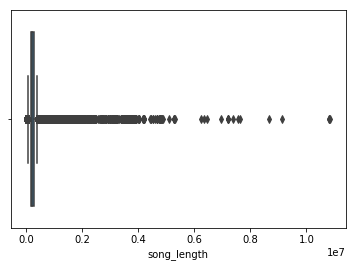

count      359914
mean       248419
std        146699
min          1393
25%        198217
50%        233732
75%        274746
max      10851706
Name: song_length, dtype: int64

In [5]:
song_length_unique_df = train_df[['song_id', 'song_length']].drop_duplicates('song_id')

song_length_unique_series = song_length_unique_df['song_length'].astype(np.float64)

# assert(song_length_unique_series.duplicates())
# print(song_length_unique_df)
sns.boxplot(x=song_length_unique_series)
plt.show()

song_length_unique_series.describe().astype(np.int64)

It seems that there exists outliers.
Now we treat them as outliers and so drop them.

In [6]:
song_length_unique_series = song_length_unique_series[np.abs(song_length_unique_series-song_length_unique_series.mean()) <= (3 * song_length_unique_series.std())]
song_length_unique_series.describe().astype(np.int64)

count    356821
mean     239738
std       78559
min        1393
25%      197903
50%      233128
75%      273438
max      688363
Name: song_length, dtype: int64

Notice that there exists very long song were played by users.

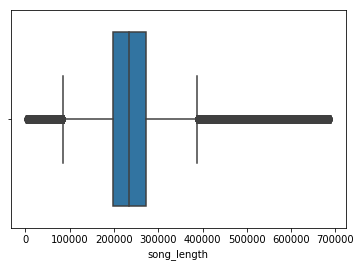

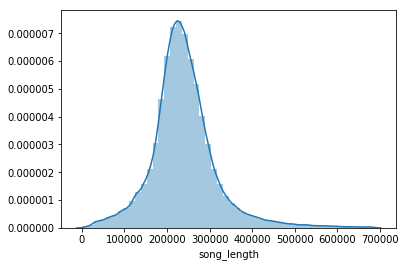

In [7]:
sns.boxplot(song_length_unique_series)
plt.show()

sns.distplot(song_length_unique_series)
plt.show()

It seems the distribution is almost normal after removing outliers.

### more on song_length

1393.0 10851706.0 244999.9657807953


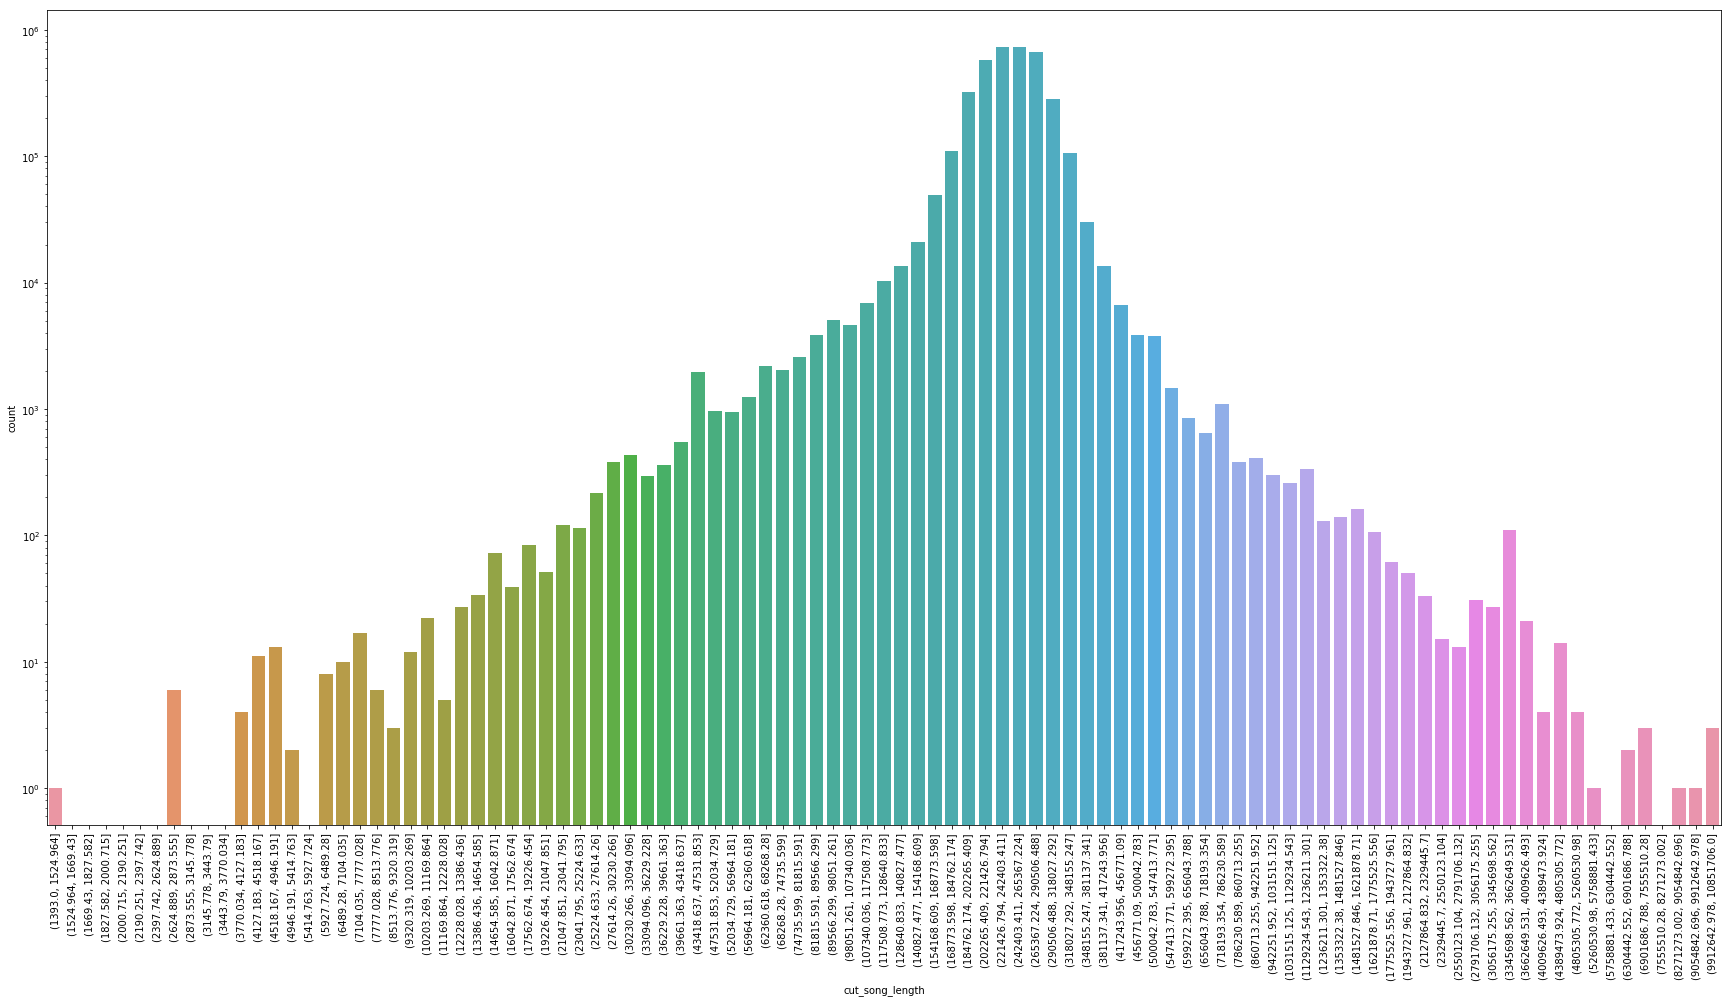

In [8]:
count_df = train_df[['song_length', 'target']]
count_df = count_df[count_df['target'] == 1]


# transform scale unit into "log10"
count_df['song_length'] = count_df['song_length'].astype(np.float64)
print(count_df['song_length'].min(), count_df['song_length'].max(), count_df['song_length'].mean())
length_bins = np.logspace(np.log10(count_df['song_length'].min()), np.log10(count_df['song_length'].max()), 100)

# ignore missing data
count_df['song_length'].fillna(0.0, inplace=True)

count_df['cut_song_length'] = pd.cut(count_df['song_length'], bins=length_bins)
count_df.head(10)

plt.figure(figsize=(30, 15)) 
plt.xticks(rotation=90)
g = sns.countplot(x='cut_song_length', data=count_df)
g.set_yscale('log', nonposy='clip')
plt.show()

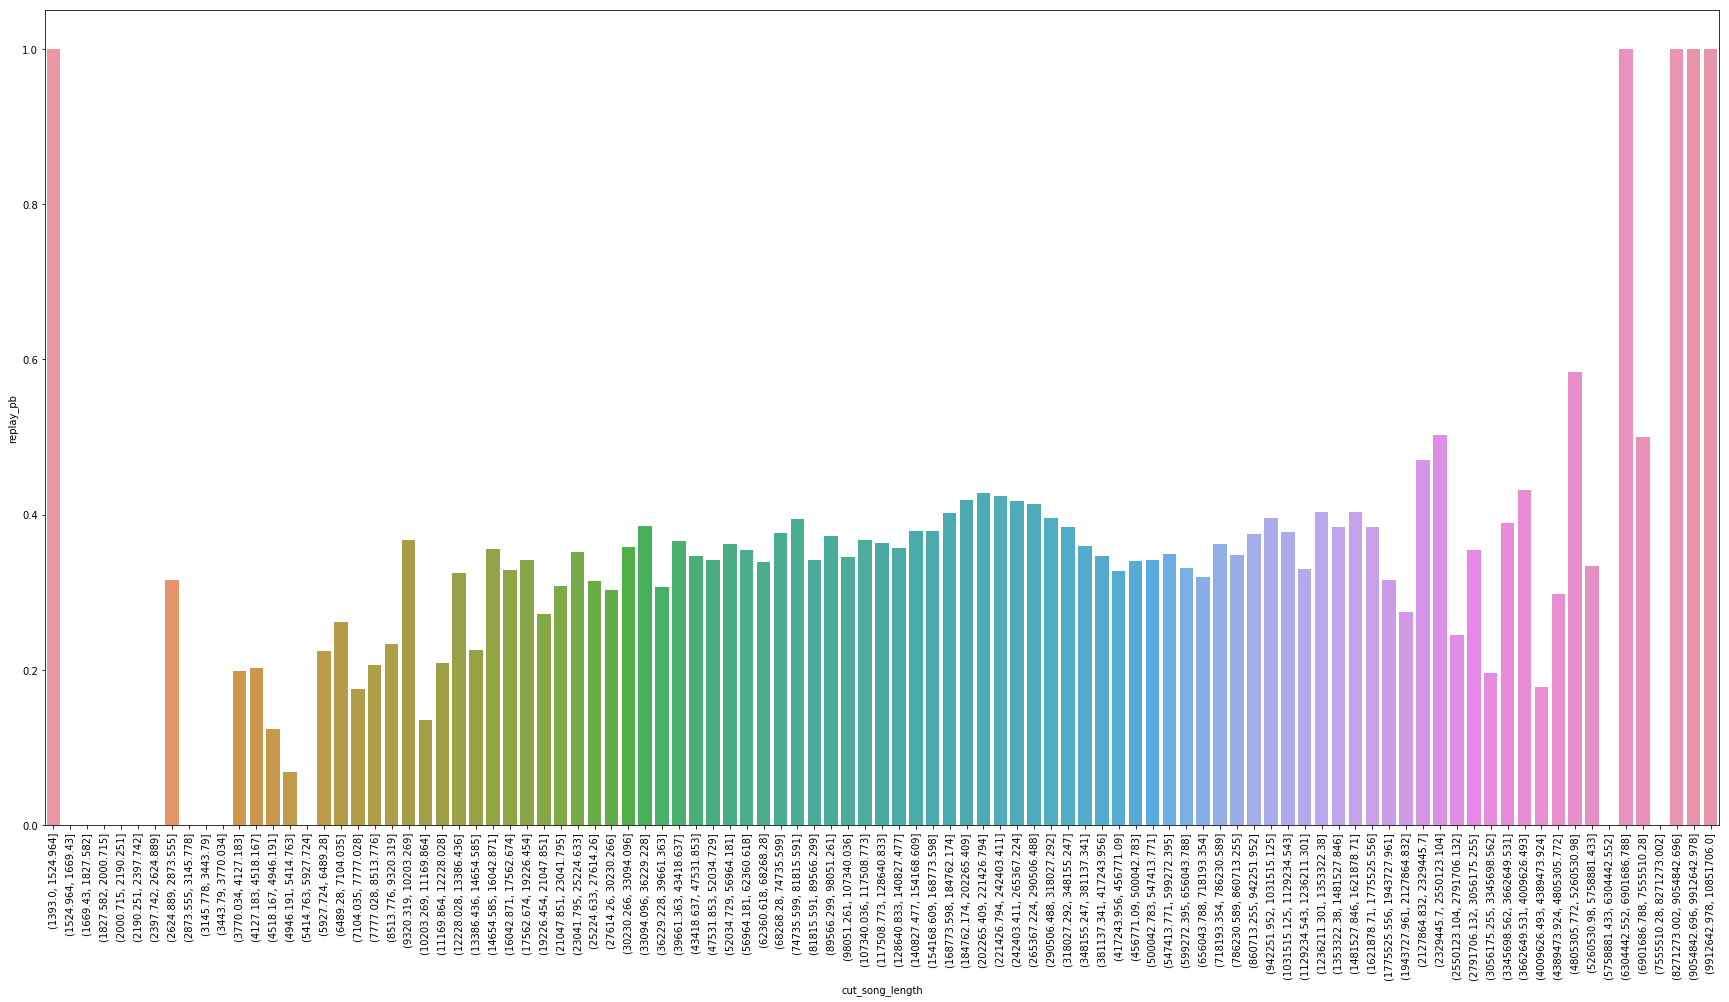

In [9]:
count_df = train_df[['song_length', 'target']].groupby('song_length').agg('mean')
count_df.reset_index(inplace=True)
count_df.columns = ['song_length', 'replay_pb']

# transform scale unit into "log10"
count_df['song_length'] = count_df['song_length'].astype(np.float64)
length_bins = np.logspace(np.log10(count_df['song_length'].min()), np.log10(count_df['song_length'].max()), 100)
count_df['song_length'].fillna(0.0, inplace=True)

count_df['cut_song_length'] = pd.cut(count_df['song_length'], bins=length_bins)


count_df = count_df[['cut_song_length', 'replay_pb']].groupby('cut_song_length').agg('mean')
count_df.reset_index(inplace=True)
count_df.head(10)

plt.figure(figsize=(30, 15)) 
plt.xticks(rotation=90)
sns.barplot(y='replay_pb', x='cut_song_length', data=count_df)
plt.show()

The songs whose song length larger than average one (248419 ms) have larger chance for replaying.
Maybe the longer songs are played from small users; but these users really like them.
也就是說，冷門的歌曲更會被其歌迷追蹤。

## genre_ids

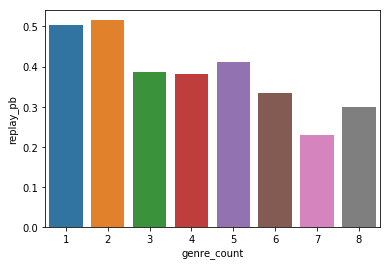

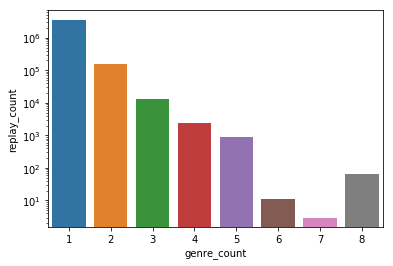

,genre_count,replay_pb,play_count,replay_count
0,1,0.503714,7037101,3544685
1,2,0.515374,298160,153664
2,3,0.386646,33682,13023
3,4,0.382546,6096,2332
4,5,0.411792,2120,873
5,6,0.333333,33,11
6,7,0.230769,13,3
7,8,0.300469,213,64


In [10]:
count_df = train_df[['genre_count', 'target']].groupby('genre_count').agg(['mean', 'count'])
count_df.reset_index(inplace=True)
count_df.columns = ['genre_count', 'replay_pb', 'play_count']

count_df['replay_count'] = (count_df['replay_pb'] * count_df['play_count']).astype(np.int32)

sns.barplot(x='genre_count', y='replay_pb', data=count_df)
plt.show()

g = sns.barplot(x='genre_count', y='replay_count', data=count_df)
g.set_yscale('log', nonposy='clip')
plt.show()
count_df

**genre_ids** having 1 or 2 category is more chance to replay than more than 2 categories.
Replayed songs labeled single genre are more than others.

573


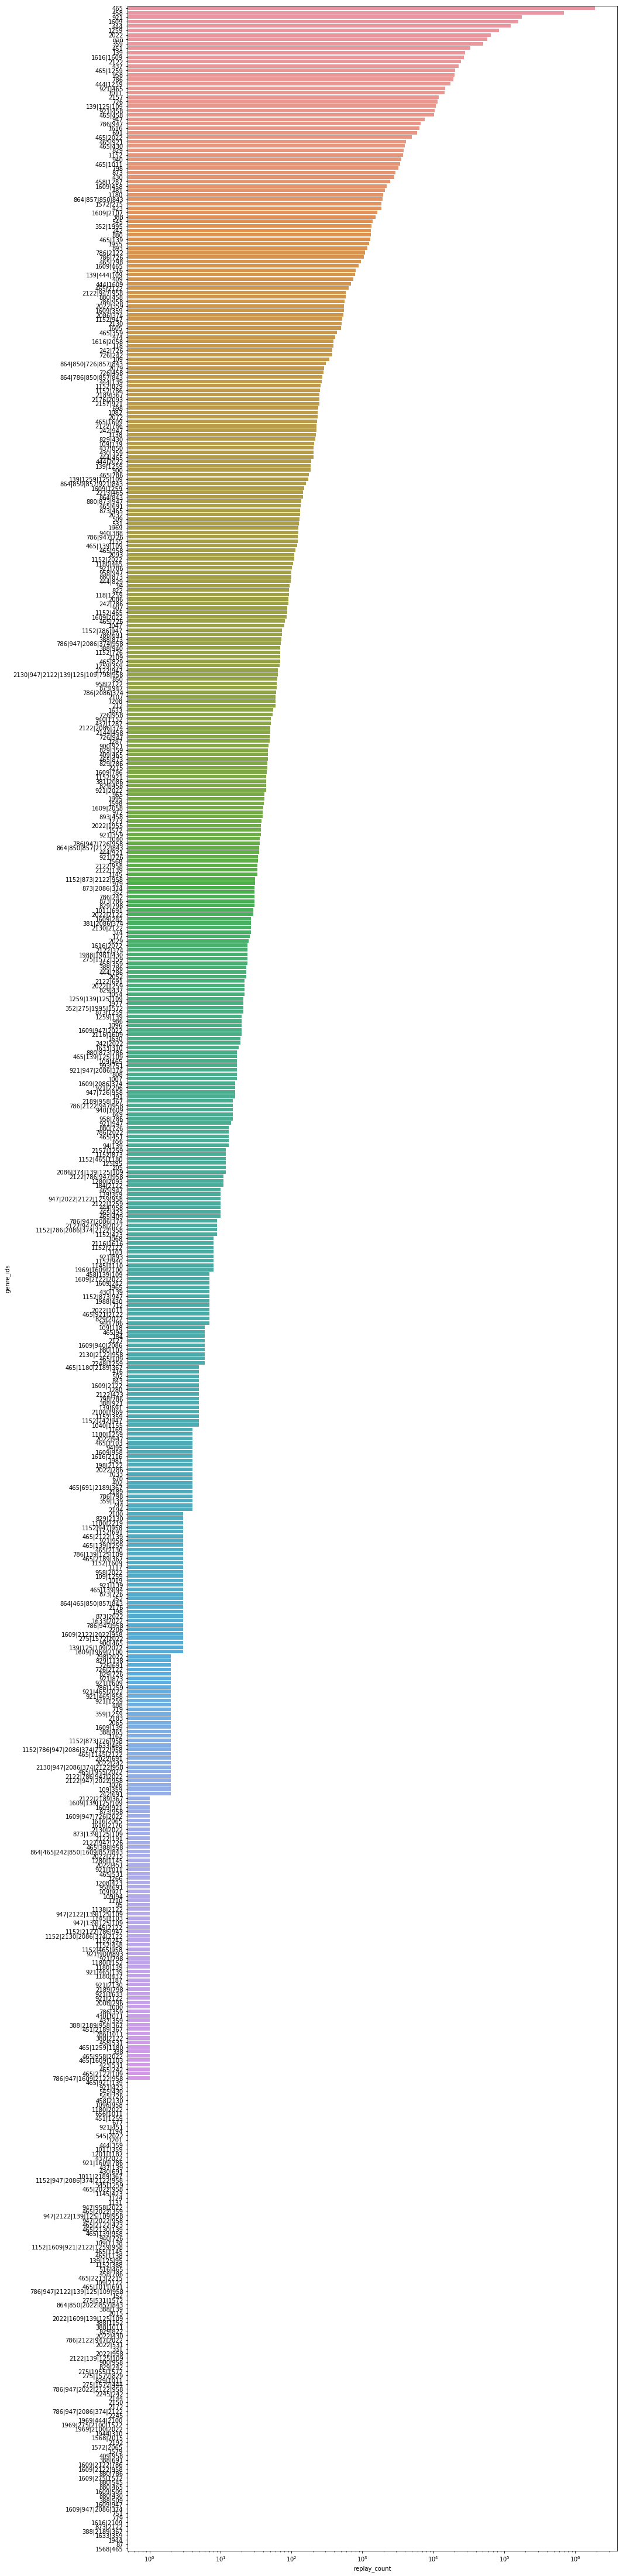

In [11]:
count_df = train_df[['genre_ids', 'target']].groupby('genre_ids').agg(['mean', 'count'])
count_df.reset_index(inplace=True)
count_df.columns = ['genre_ids', 'replay_pb', 'play_count']
print(len(count_df))

count_df['replay_count'] = (count_df['replay_pb'] * count_df['play_count']).astype(np.int32)
count_df = count_df.sort_values(by=['replay_count'], ascending=False)

plt.figure(figsize=(15, 80))
g = sns.barplot(y='genre_ids', x='replay_count', data=count_df)
g.set_xscale('log', nonposx='clip')
plt.show()

There are total **573** combinations in *genre_ids*.
Notice that *genre 465* is the most popular; however, there is *genre 1568|465* which is the most unpopular where they both contain *genre 465*.
Hence, we can not decompose composite genres into several separate genres for consideration.

## artist_name

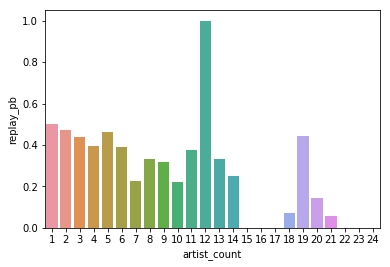

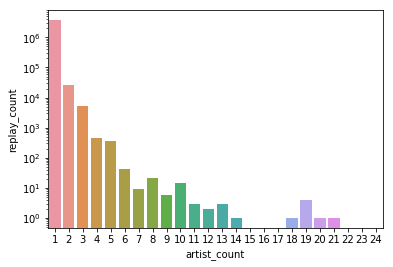

,artist_count,replay_pb,play_count,replay_count
0,1,0.503873,7308305,3682455
1,2,0.474475,54966,26080
2,3,0.439966,11785,5185
3,4,0.393571,1151,453
4,5,0.462779,806,373
5,6,0.392523,107,42
6,7,0.225000,40,9
7,8,0.333333,66,22
8,9,0.315789,19,6
9,10,0.223881,67,15


In [12]:
count_df = train_df[['artist_count', 'target']].groupby('artist_count').agg(['mean', 'count'])
count_df.reset_index(inplace=True)
count_df.columns = ['artist_count', 'replay_pb', 'play_count']

count_df['replay_count'] = (count_df['replay_pb'] * count_df['play_count']).astype(np.int32)

sns.barplot(x='artist_count', y='replay_pb', data=count_df)
plt.show()

g = sns.barplot(x='artist_count', y='replay_count', data=count_df)
g.set_yscale('log', nonposy='clip')
plt.show()
count_df

**artist_count** might not helpful.

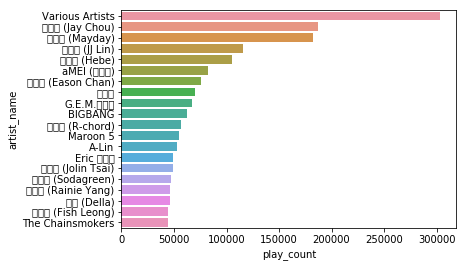

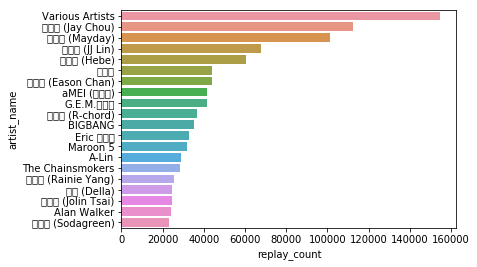

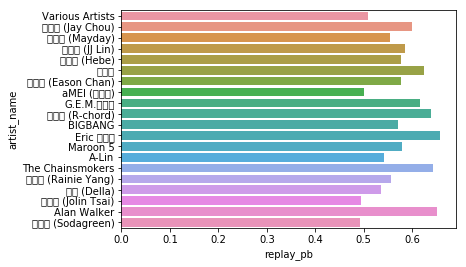

In [13]:
artist_df = train_df[['artist_name', 'target']].groupby('artist_name').agg(['mean', 'count']).reset_index()
artist_df.columns = ['artist_name', 'replay_pb', 'play_count']
# artist_df['artist_name'] = artist_df['artist_name'].apply(lambda x: x.decode('utf-8'))
artist_df['replay_count'] = (artist_df['replay_pb'] * artist_df['play_count']).astype(np.int32)
artist_df.head(15)

sns.barplot(y='artist_name', x='play_count', data=artist_df.sort_values(by=['play_count'], ascending=False).head(20))
plt.show()

sns.barplot(y='artist_name', x='replay_count', data=artist_df.sort_values(by=['replay_count'], ascending=False).head(20))
plt.show()

sns.barplot(y='artist_name', x='replay_pb', data=artist_df.sort_values(by=['replay_count'], ascending=False).head(20))
plt.show()

Many songs sung by Chinese artists are listend by users.

Furthermore, **Various Artist** means several artists; i.e., a song sung by composite singers is more popular.

## composer

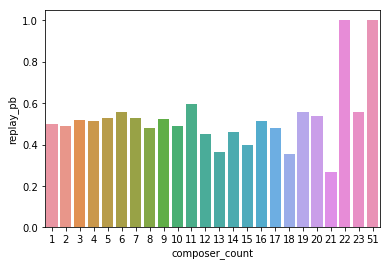

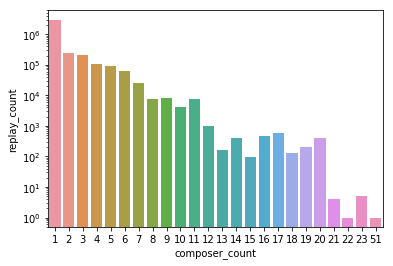

,composer_count,replay_pb,play_count,replay_count
0,1,0.501181,5890723,2952316
1,2,0.489760,493740,241814
2,3,0.520069,395390,205630
3,4,0.512322,212706,108974
4,5,0.529897,169346,89736
5,6,0.556705,109038,60702
6,7,0.527919,46545,24571
7,8,0.478578,15358,7350
8,9,0.525241,15966,8386
9,10,0.489256,8470,4144


In [14]:
count_df = train_df[['composer_count', 'target']].groupby('composer_count').agg(['mean', 'count'])
count_df.reset_index(inplace=True)
count_df.columns = ['composer_count', 'replay_pb', 'play_count']

count_df['replay_count'] = (count_df['replay_pb'] * count_df['play_count']).astype(np.int32)

sns.barplot(x='composer_count', y='replay_pb', data=count_df)
plt.show()

g = sns.barplot(x='composer_count', y='replay_count', data=count_df)
g.set_yscale('log', nonposy='clip')
plt.show()
count_df

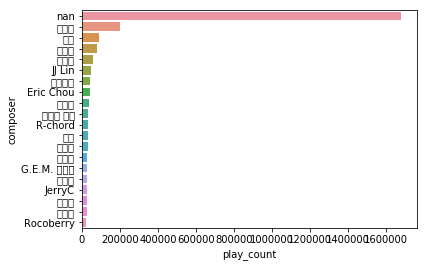

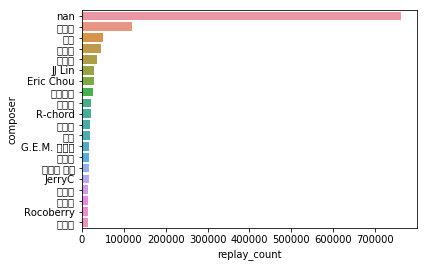

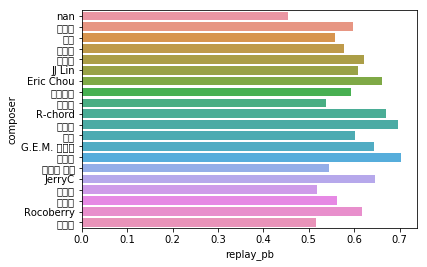

0.0054674475264
0.998519935437


,composer,replay_pb,play_count,replay_count
64876,nan,0.453613,1675706,760122
67156,周杰倫,0.597737,201910,120689
74068,阿信,0.557940,90343,50406
70043,林俊傑,0.577564,78606,45400
74543,陳皓宇,0.622618,58837,36633
27410,JJ Lin,0.609037,48089,29287
68783,張簡君偉,0.594053,43619,25912
19107,Eric Chou,0.661421,42832,28330
74820,韋禮安,0.538275,39621,21327
66348,八三夭 阿璞,0.545482,32782,17882


In [15]:
composer_df = train_df[['composer', 'target']].groupby('composer').agg(['mean', 'count']).reset_index()
composer_df.columns = ['composer', 'replay_pb', 'play_count']
composer_df['replay_count'] = (composer_df['replay_pb'] * composer_df['play_count']).astype(np.int32)


sns.barplot(y='composer', x='play_count', data=composer_df.sort_values(by=['play_count'], ascending=False).head(20))
plt.show()

sns.barplot(y='composer', x='replay_count', data=composer_df.sort_values(by=['replay_count'], ascending=False).head(20))
plt.show()

sns.barplot(y='composer', x='replay_pb', data=composer_df.sort_values(by=['replay_count'], ascending=False).head(20))
plt.show()

print(composer_df['play_count'].corr(composer_df['replay_pb']))
print(composer_df['play_count'].corr(composer_df['replay_count']))

composer_df.sort_values(by=['play_count'], ascending=False).head(15)

The more play counts, almost the more replay counts.
There are so so so many missing value.

## lyricist

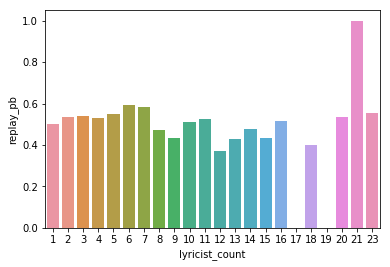

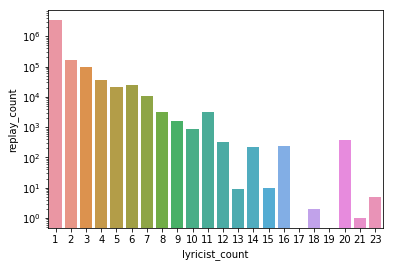

,lyricist_count,replay_pb,play_count,replay_count
0,1,0.499708,6711568,3353826
1,2,0.536552,301695,161875
2,3,0.542637,177638,96392
3,4,0.532945,67431,35937
4,5,0.552324,38061,21022
5,6,0.594204,42201,25076
6,7,0.581922,18121,10545
7,8,0.471900,6904,3258
8,9,0.433045,3704,1604
9,10,0.513403,1716,880


In [16]:
count_df = train_df[['lyricist_count', 'target']].groupby('lyricist_count').agg(['mean', 'count'])
count_df.reset_index(inplace=True)
count_df.columns = ['lyricist_count', 'replay_pb', 'play_count']

count_df['replay_count'] = (count_df['replay_pb'] * count_df['play_count']).astype(np.int32)

sns.barplot(x='lyricist_count', y='replay_pb', data=count_df)
plt.show()

g = sns.barplot(x='lyricist_count', y='replay_count', data=count_df)
g.set_yscale('log', nonposy='clip')
plt.show()
count_df

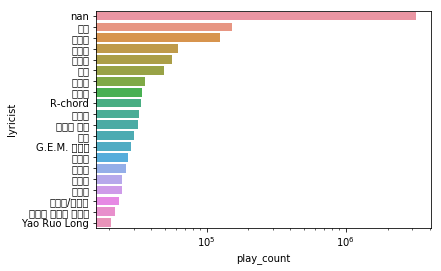

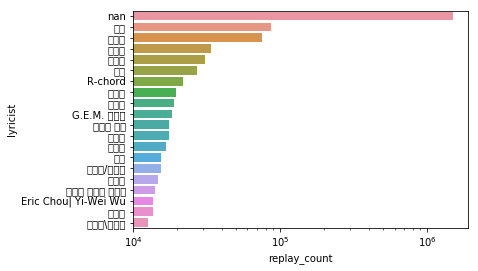

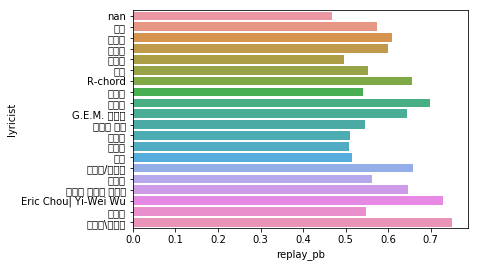

0.00410481273244
0.999761738532


,lyricist,replay_pb,play_count,replay_count
22883,nan,0.468265,3178797,1488518
32090,阿信,0.573532,151301,86776
27177,方文山,0.608124,124108,75473
25567,姚若龍,0.495160,62190,30794
25069,周杰倫,0.600249,56235,33755
28101,林夕,0.552081,49279,27205
32867,韋禮安,0.541291,36291,19644
24958,吳青峰,0.509086,34503,17565
17329,R-chord,0.655580,33613,22036
30709,葛大為,0.508900,32867,16726


In [17]:
lyricist_df = train_df[['lyricist', 'target']].groupby('lyricist').agg(['mean', 'count']).reset_index()
lyricist_df.columns = ['lyricist', 'replay_pb', 'play_count']
lyricist_df['replay_count'] = (lyricist_df['replay_pb'] * lyricist_df['play_count']).astype(np.int32)


g = sns.barplot(y='lyricist', x='play_count', data=lyricist_df.sort_values(by=['play_count'], ascending=False).head(20))
g.set_xscale('log', nonposx='clip')
plt.show()

g = sns.barplot(y='lyricist', x='replay_count', data=lyricist_df.sort_values(by=['replay_count'], ascending=False).head(20))
g.set_xscale('log', nonposx='clip')
plt.show()

sns.barplot(y='lyricist', x='replay_pb', data=lyricist_df.sort_values(by=['replay_count'], ascending=False).head(20))
plt.show()

print(lyricist_df['play_count'].corr(lyricist_df['replay_pb']))
print(lyricist_df['play_count'].corr(lyricist_df['replay_count']))

lyricist_df.sort_values(by=['play_count'], ascending=False).head(15)

The more play counts, almost the more replay counts.
There are so so so many missing value.

## language

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
language        11 non-null object
replay_pb       11 non-null float64
play_count      11 non-null int64
replay_count    11 non-null int32
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 388.0+ bytes
None


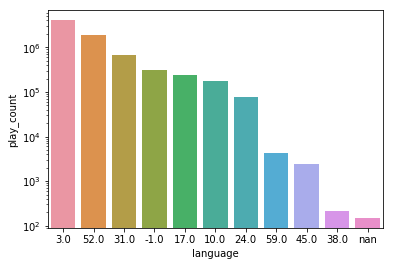

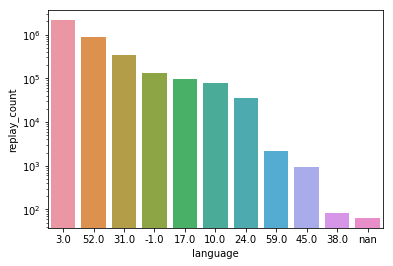

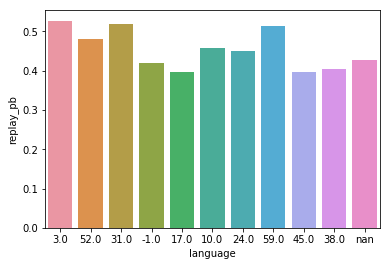

0.594590745427
0.589400972603
0.999226932777


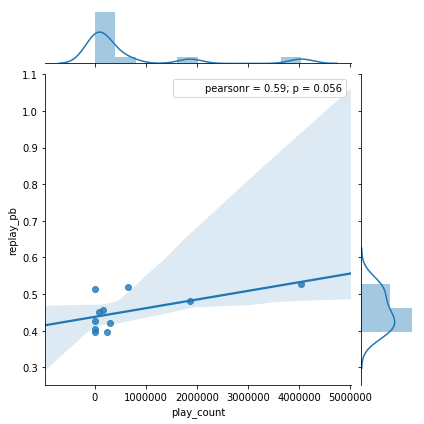

,language,replay_pb,play_count,replay_count
1,3,0.527132,4044643,2132059
8,52,0.481398,1864789,897706
5,31,0.519111,656623,340860
0,-1,0.419890,308752,129642
3,17,0.396453,245136,97185
2,10,0.456644,171904,78499
4,24,0.450948,78621,35454
9,59,0.513475,4193,2153
7,45,0.395912,2397,949
6,38,0.404762,210,85


In [18]:
language_df = train_df[['language', 'target']].groupby('language').agg(['mean', 'count']).reset_index()
language_df.columns = ['language', 'replay_pb', 'play_count']
language_df['replay_count'] = (language_df['replay_pb'] * language_df['play_count']).astype(np.int32)

print(language_df.info())
g = sns.barplot(x='language', y='play_count', data=language_df.sort_values(by=['play_count'], ascending=False))
g.set_yscale('log', nonposy='clip')
plt.show()

g = sns.barplot(x='language', y='replay_count', data=language_df.sort_values(by=['replay_count'], ascending=False))
g.set_yscale('log', nonposy='clip')
plt.show()

sns.barplot(x='language', y='replay_pb', data=language_df.sort_values(by=['replay_count'], ascending=False))
plt.show()

print(language_df['replay_count'].corr(language_df['replay_pb']))
print(language_df['play_count'].corr(language_df['replay_pb']))
print(language_df['play_count'].corr(language_df['replay_count']))

g = sns.jointplot(x="play_count", y="replay_pb", data=language_df, kind="reg")
plt.show()
language_df.sort_values(by=['play_count'], ascending=False)

We have correlation **0.59** between *replay_pb* and *play_count*.

- The language <font color='red'> 3 </font> is the most popular trivially. The language 59 has not enough samples.
- The languages <font color='red'> -1, 17, 45 </font> are rather unpopular. The language 38 has not enough samples.

# songs_extra

## missing ratio

In [19]:
songs_df.isnull().sum() / songs_df.shape[0] * 100

song_id          0.000000
song_length      0.000000
genre_ids        4.098558
artist_name      0.000000
composer        46.654996
lyricist        84.711321
language         0.000044
name             0.039193
isrc             5.984706
song_year        5.984706
song_country     5.984706
dtype: float64

## ISRC

### song year

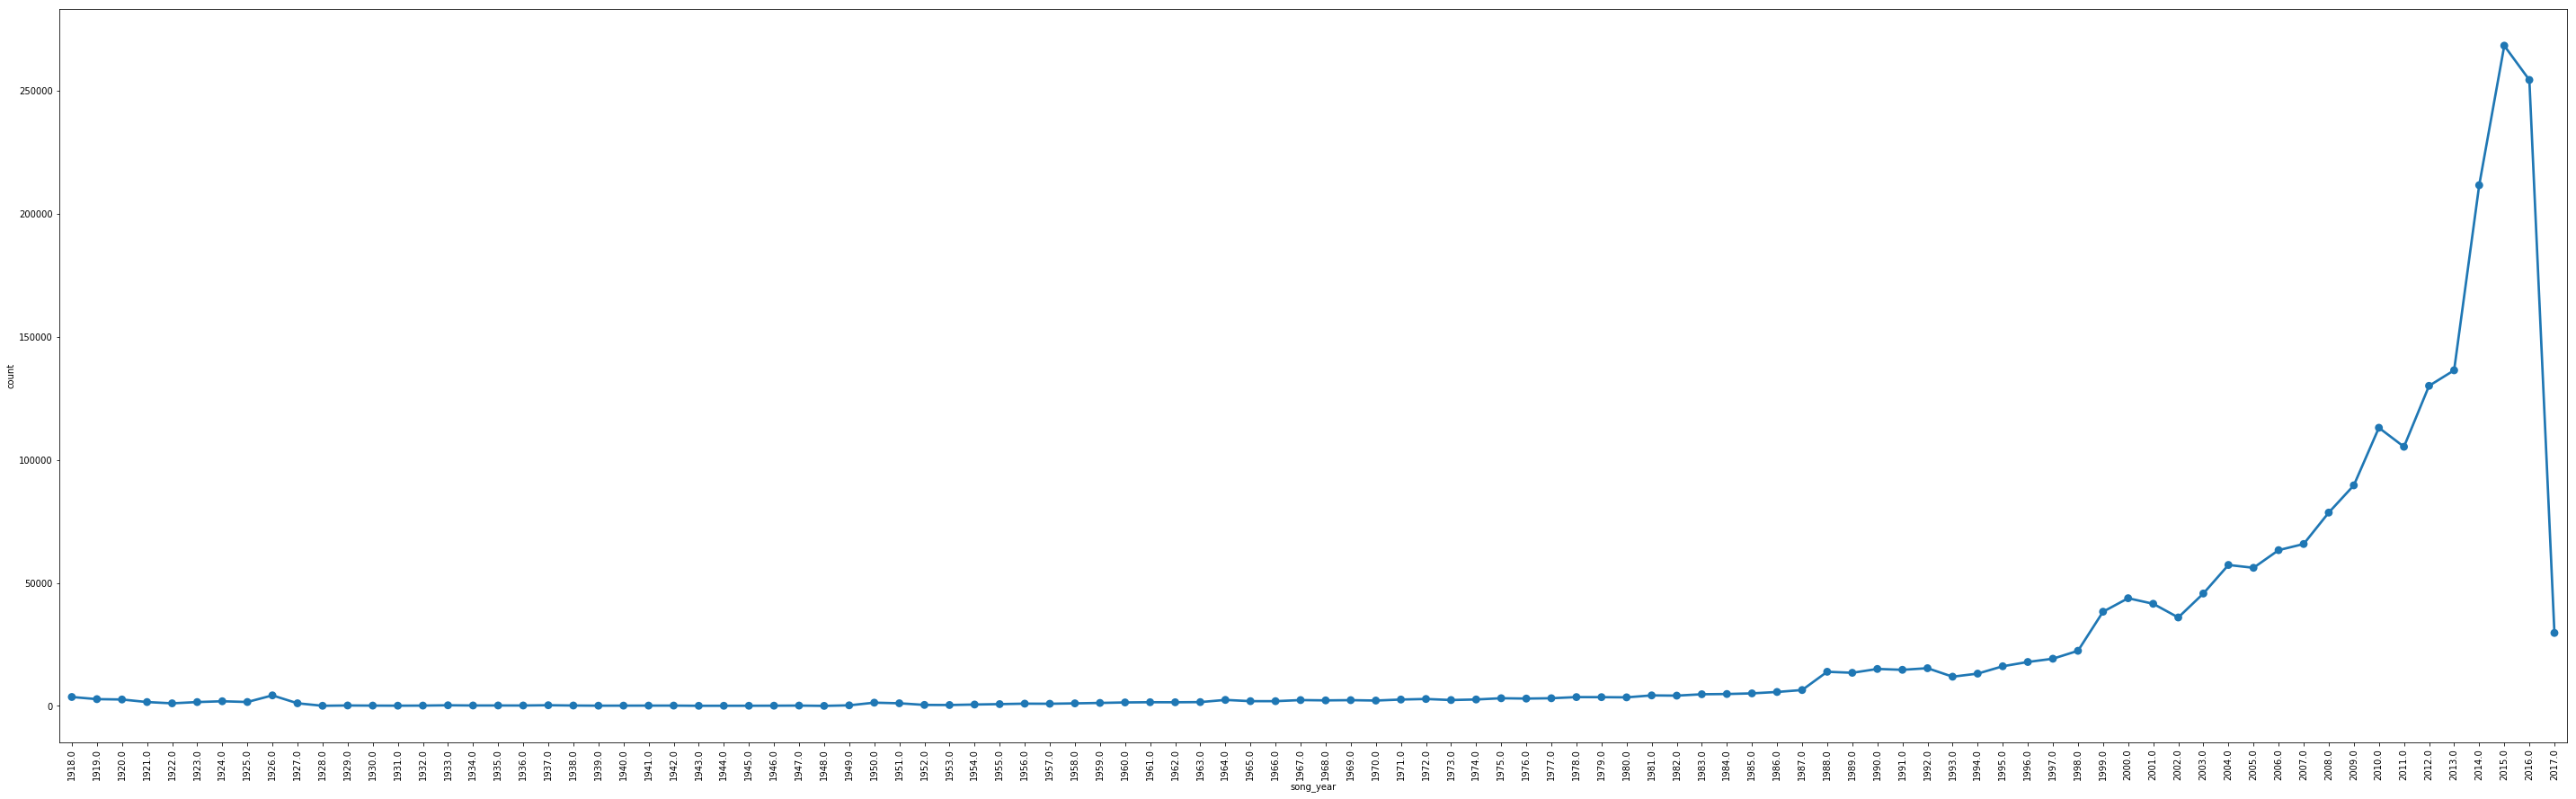

In [20]:
count_df = songs_df[['song_id', 'song_year']].groupby('song_year').agg('count').reset_index()
count_df.columns = ['song_year', 'count']

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
sns.pointplot(x='song_year', y='count', data=count_df)
plt.show()

The amount of songs are increasing when the year is near to **2016**.
Note that this ignore missing ISRC.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
song_year       101 non-null object
replay_pb       101 non-null float64
play_count      101 non-null int64
replay_count    101 non-null int32
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 2.8+ KB
None


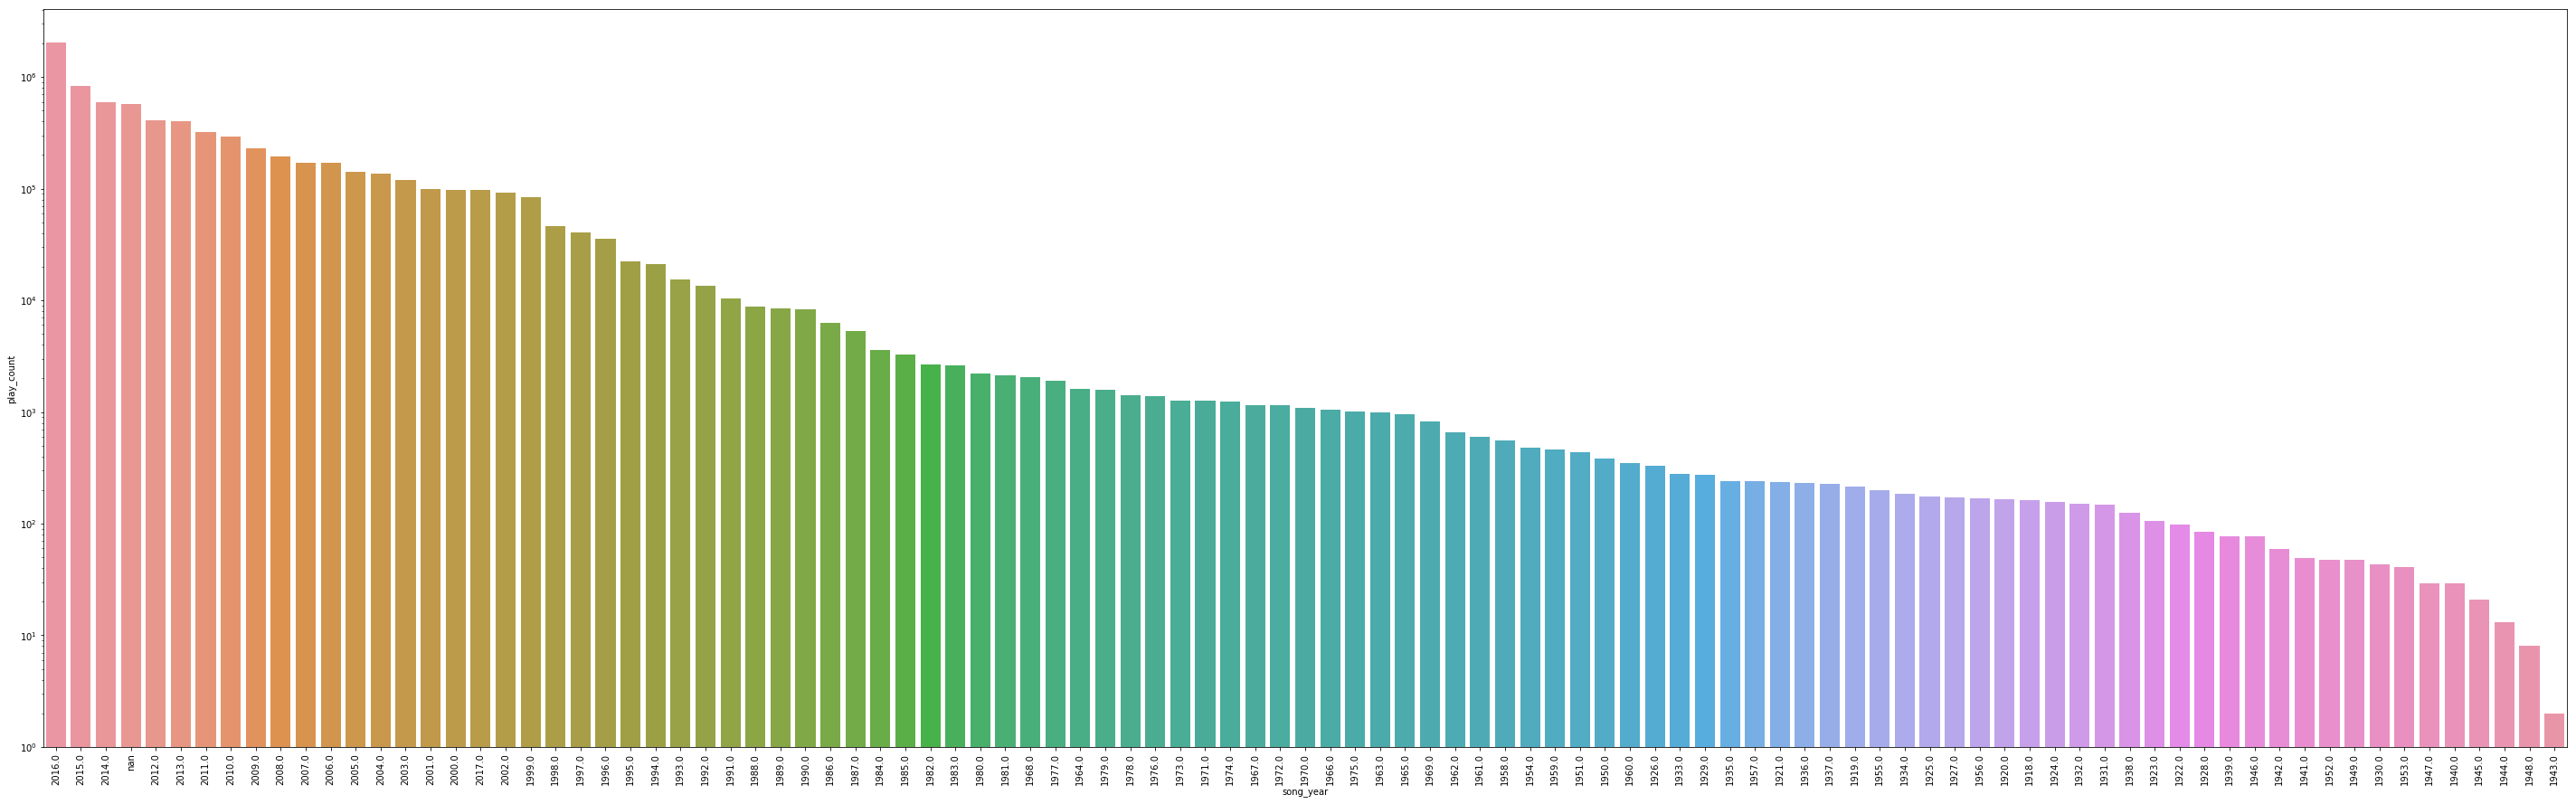

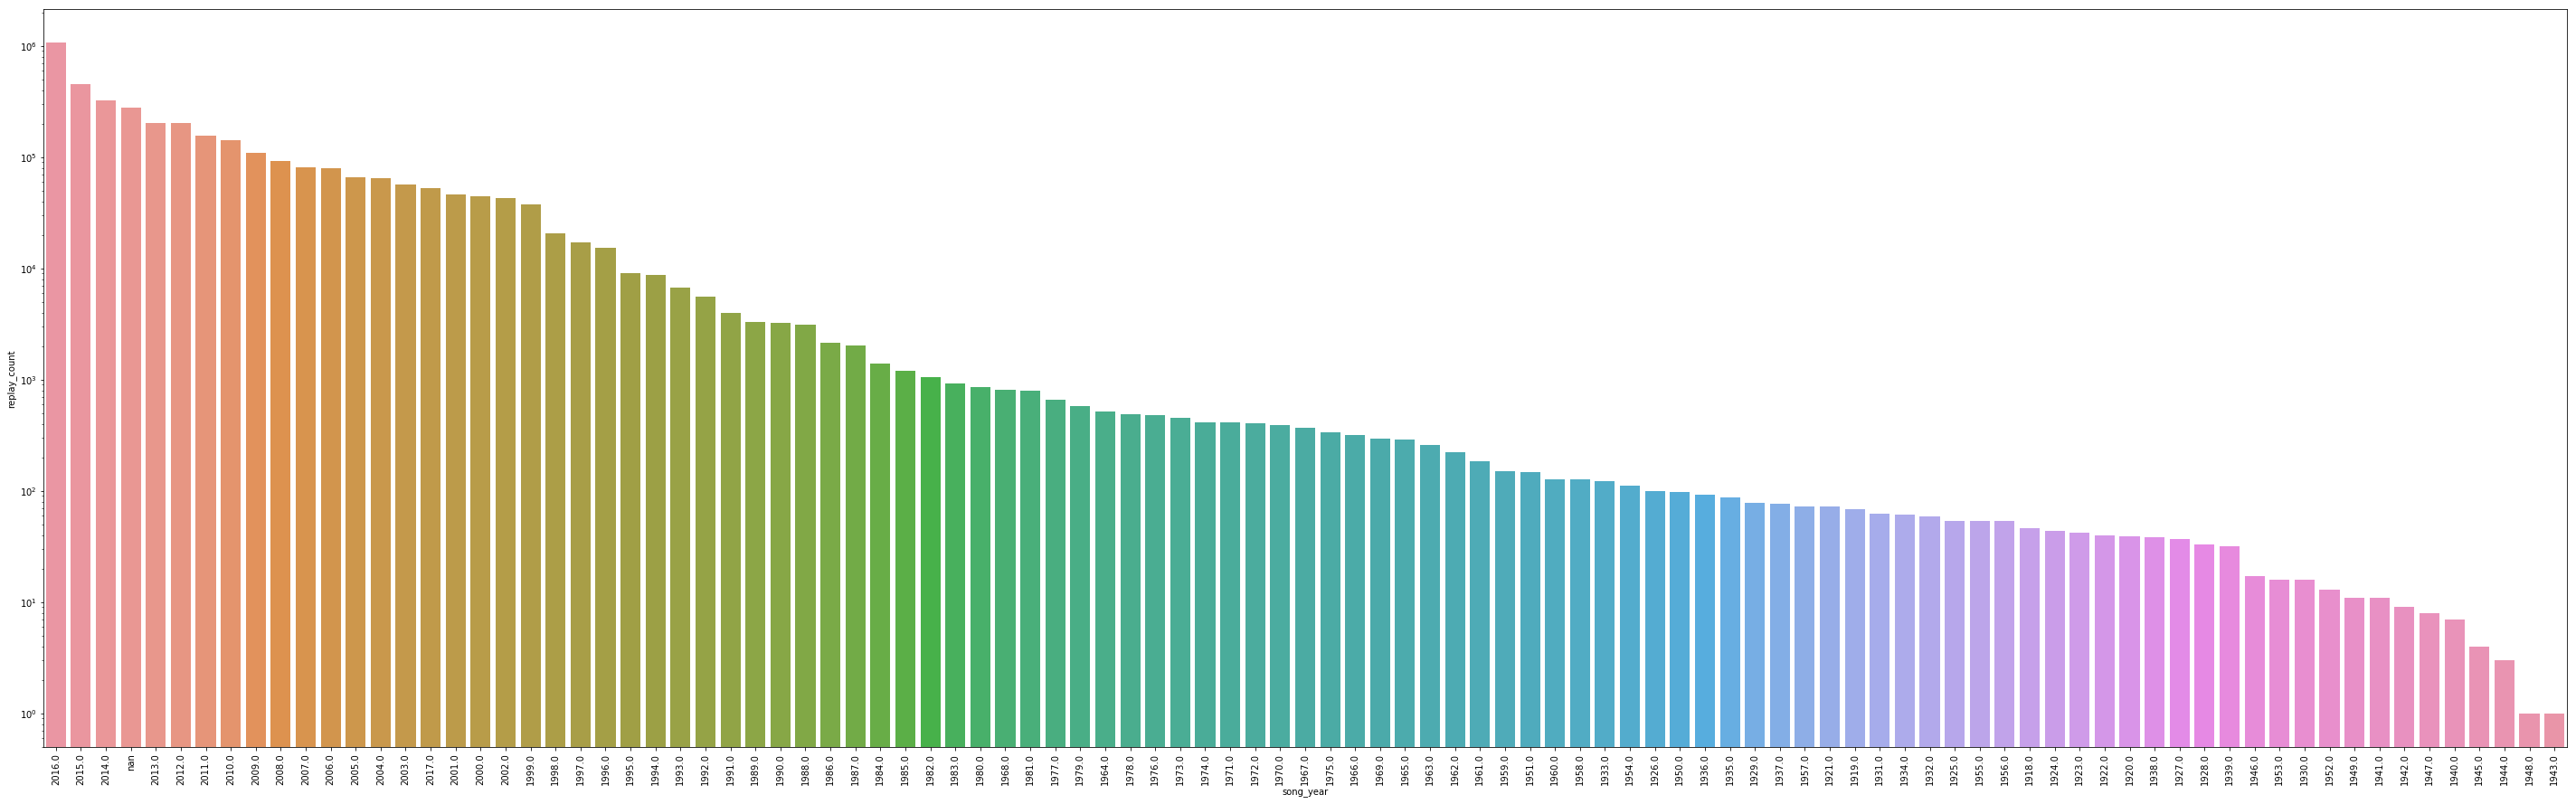

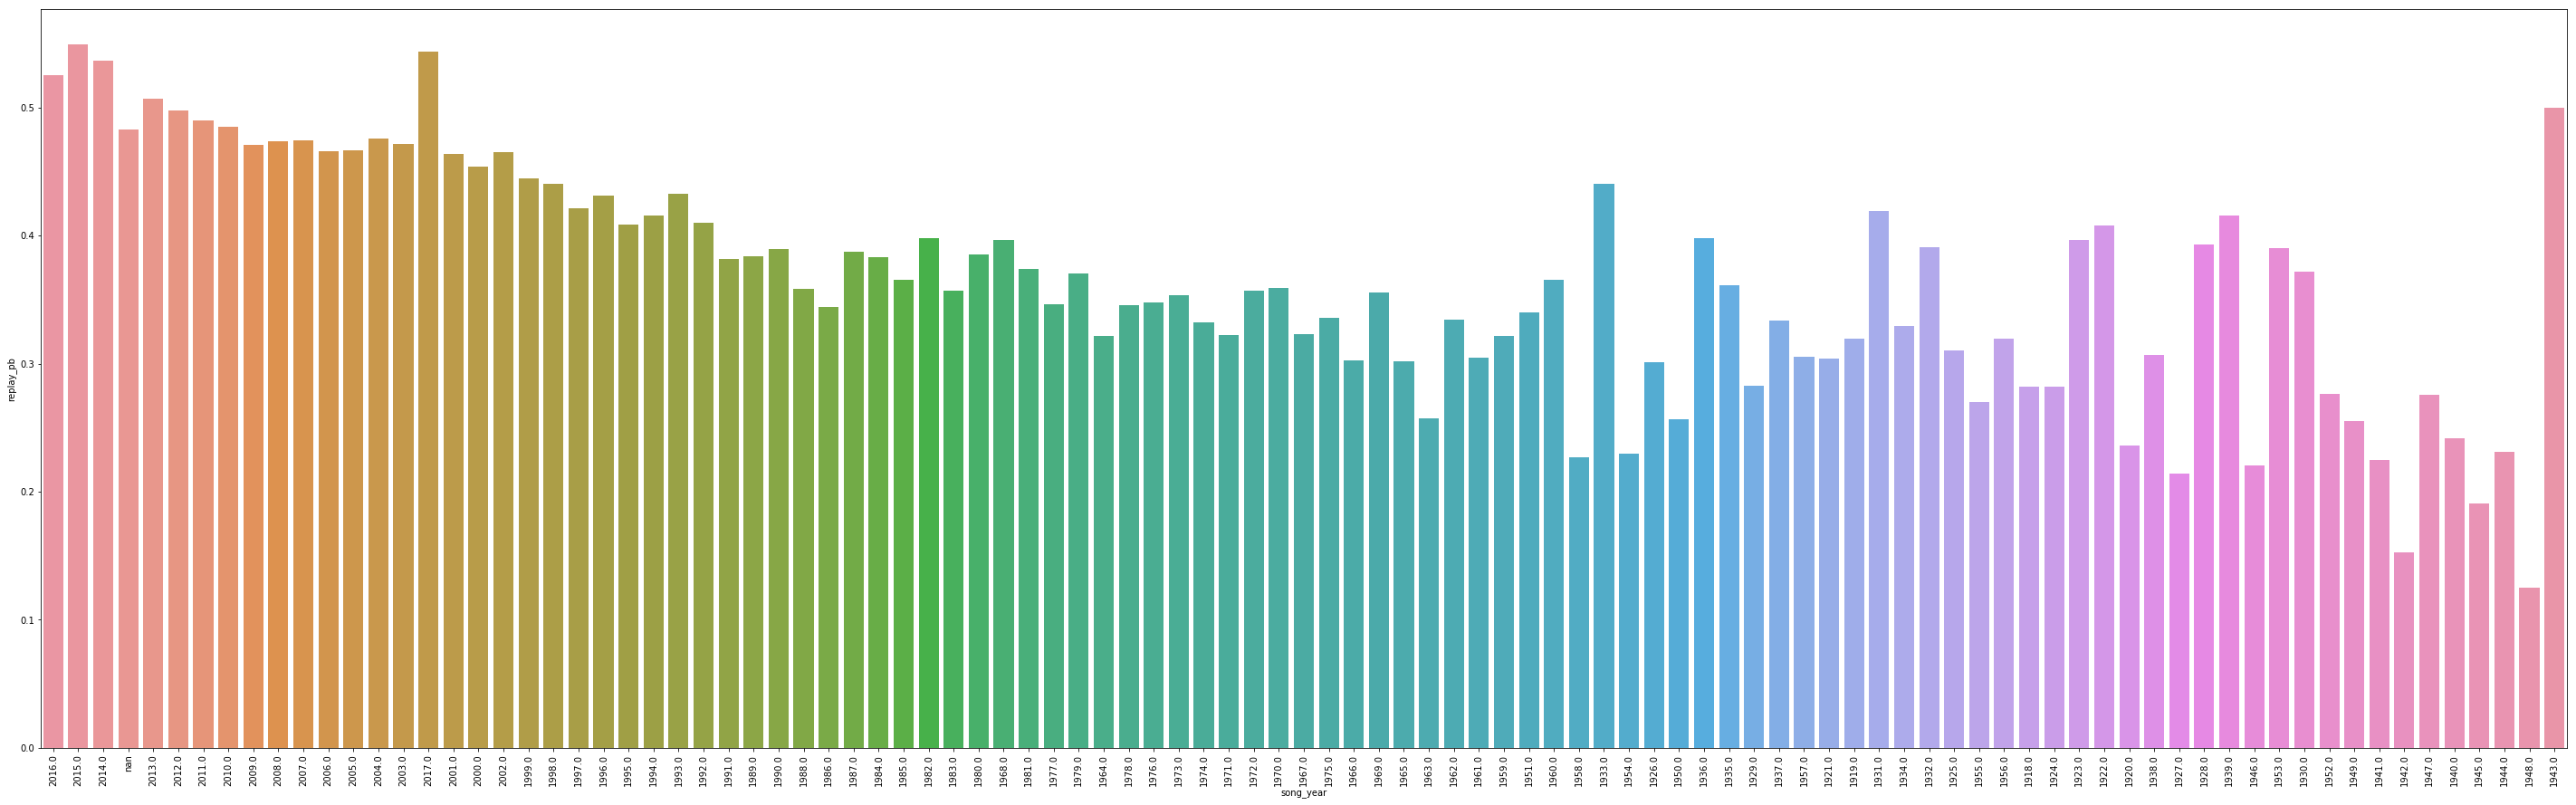

0.472418840747
0.483013873495
0.999346499148


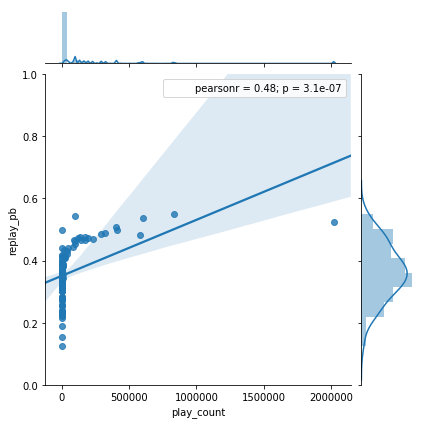

,song_year,replay_pb,play_count,replay_count
98,2016,0.525511,2021236,1062182
97,2015,0.549161,831863,456826
96,2014,0.536459,599981,321865
100,nan,0.483000,577963,279156
94,2012,0.497668,407593,202846
95,2013,0.507008,400240,202924
93,2011,0.489724,321093,157247
92,2010,0.485054,293683,142452
91,2009,0.471001,231216,108903
90,2008,0.473461,195938,92769


In [21]:
song_year_df = train_df[['song_year', 'target']].groupby('song_year').agg(['mean', 'count']).reset_index()
song_year_df.columns = ['song_year', 'replay_pb', 'play_count']
song_year_df['replay_count'] = (song_year_df['replay_pb'] * song_year_df['play_count']).astype(np.int32)

print(song_year_df.info())
plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.barplot(x='song_year', y='play_count', data=song_year_df.sort_values(by=['play_count'], ascending=False))
g.set_yscale('log', nonposy='clip')
plt.show()

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.barplot(x='song_year', y='replay_count', data=song_year_df.sort_values(by=['replay_count'], ascending=False))
g.set_yscale('log', nonposy='clip')
plt.show()

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
sns.barplot(x='song_year', y='replay_pb', data=song_year_df.sort_values(by=['replay_count'], ascending=False))
plt.show()

print(song_year_df['replay_count'].corr(song_year_df['replay_pb']))
print(song_year_df['play_count'].corr(song_year_df['replay_pb']))
print(song_year_df['play_count'].corr(song_year_df['replay_count']))

sns.jointplot(x="play_count", y="replay_pb", data=song_year_df, kind="reg", ylim=(0 ,1))
plt.show()
song_year_df.sort_values(by=['play_count'], ascending=False)

Except year **2017**, the later published songs implies the more replay count.
And we have <font color='red'>replay chance larger than 0.5 among years [2013, 2017]</font>.

### song country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
song_country    110 non-null object
replay_pb       110 non-null float64
play_count      110 non-null int64
replay_count    110 non-null int32
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 3.1+ KB
None


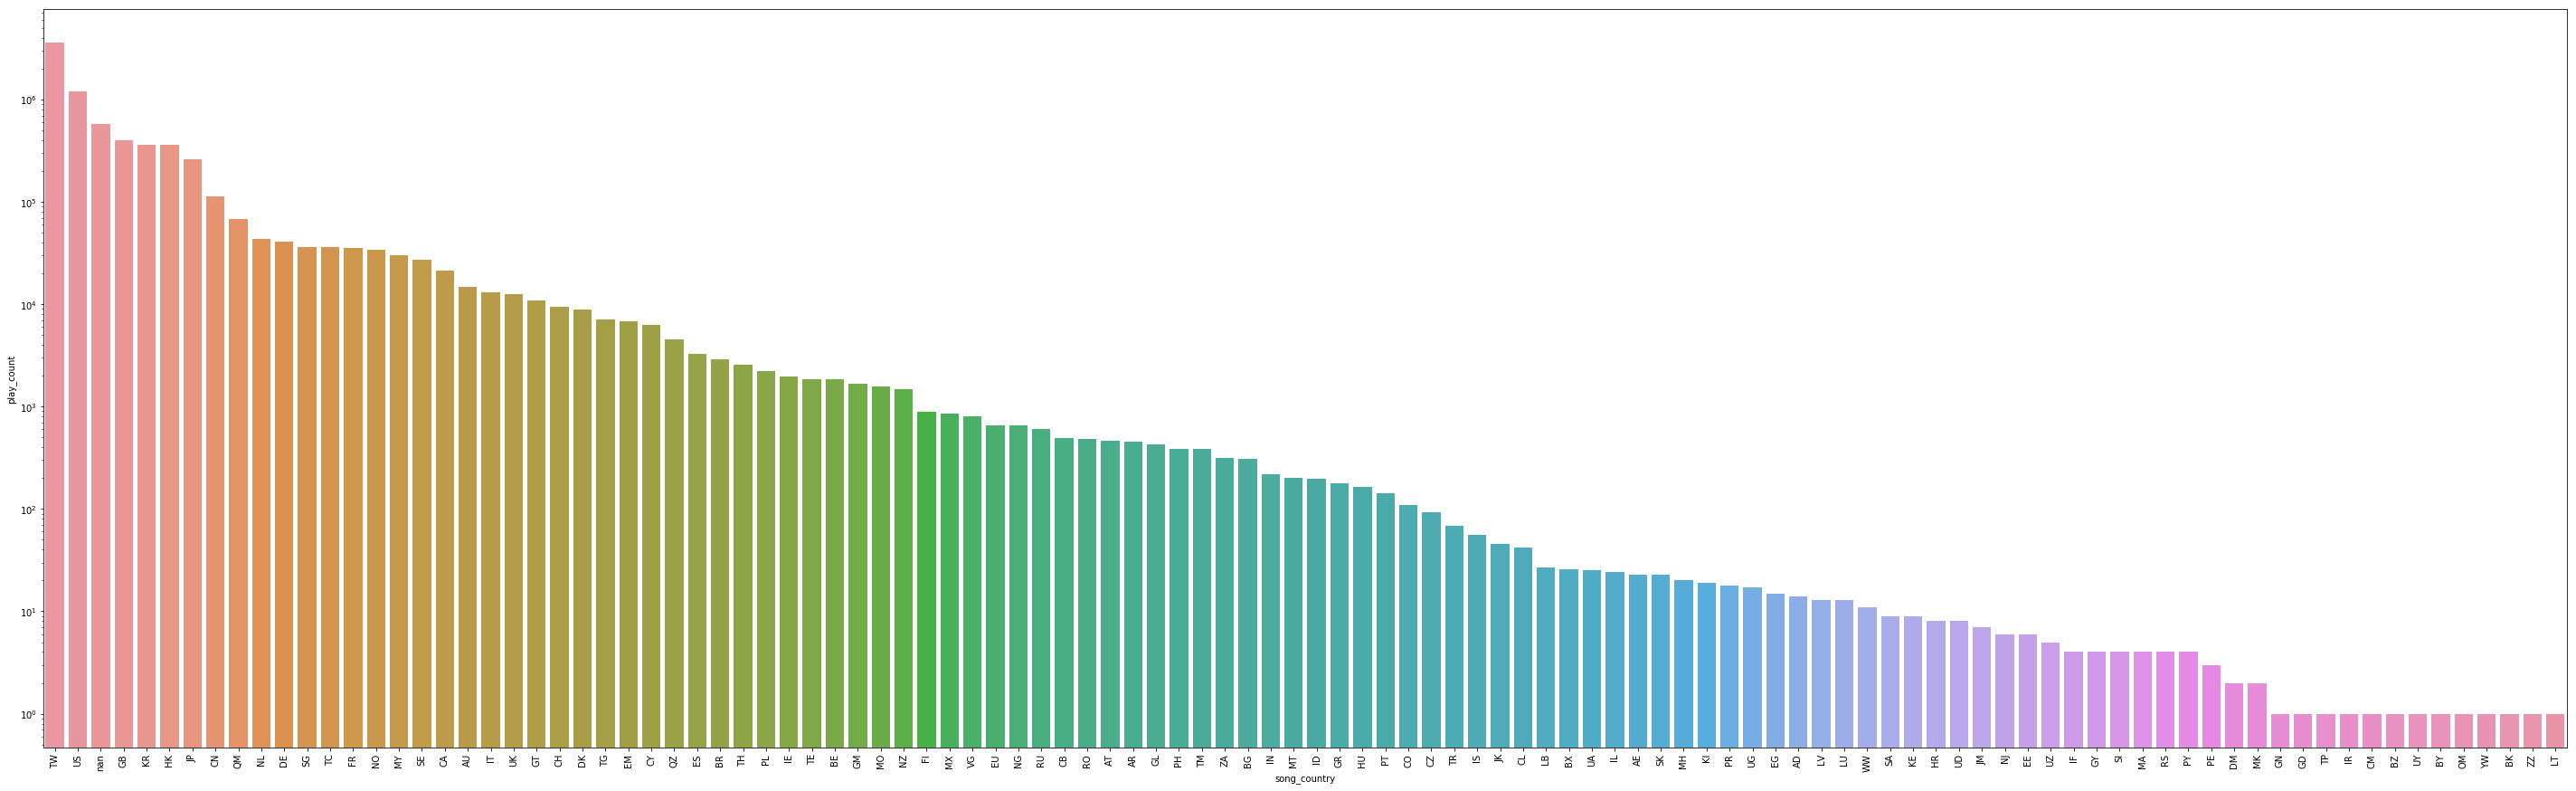

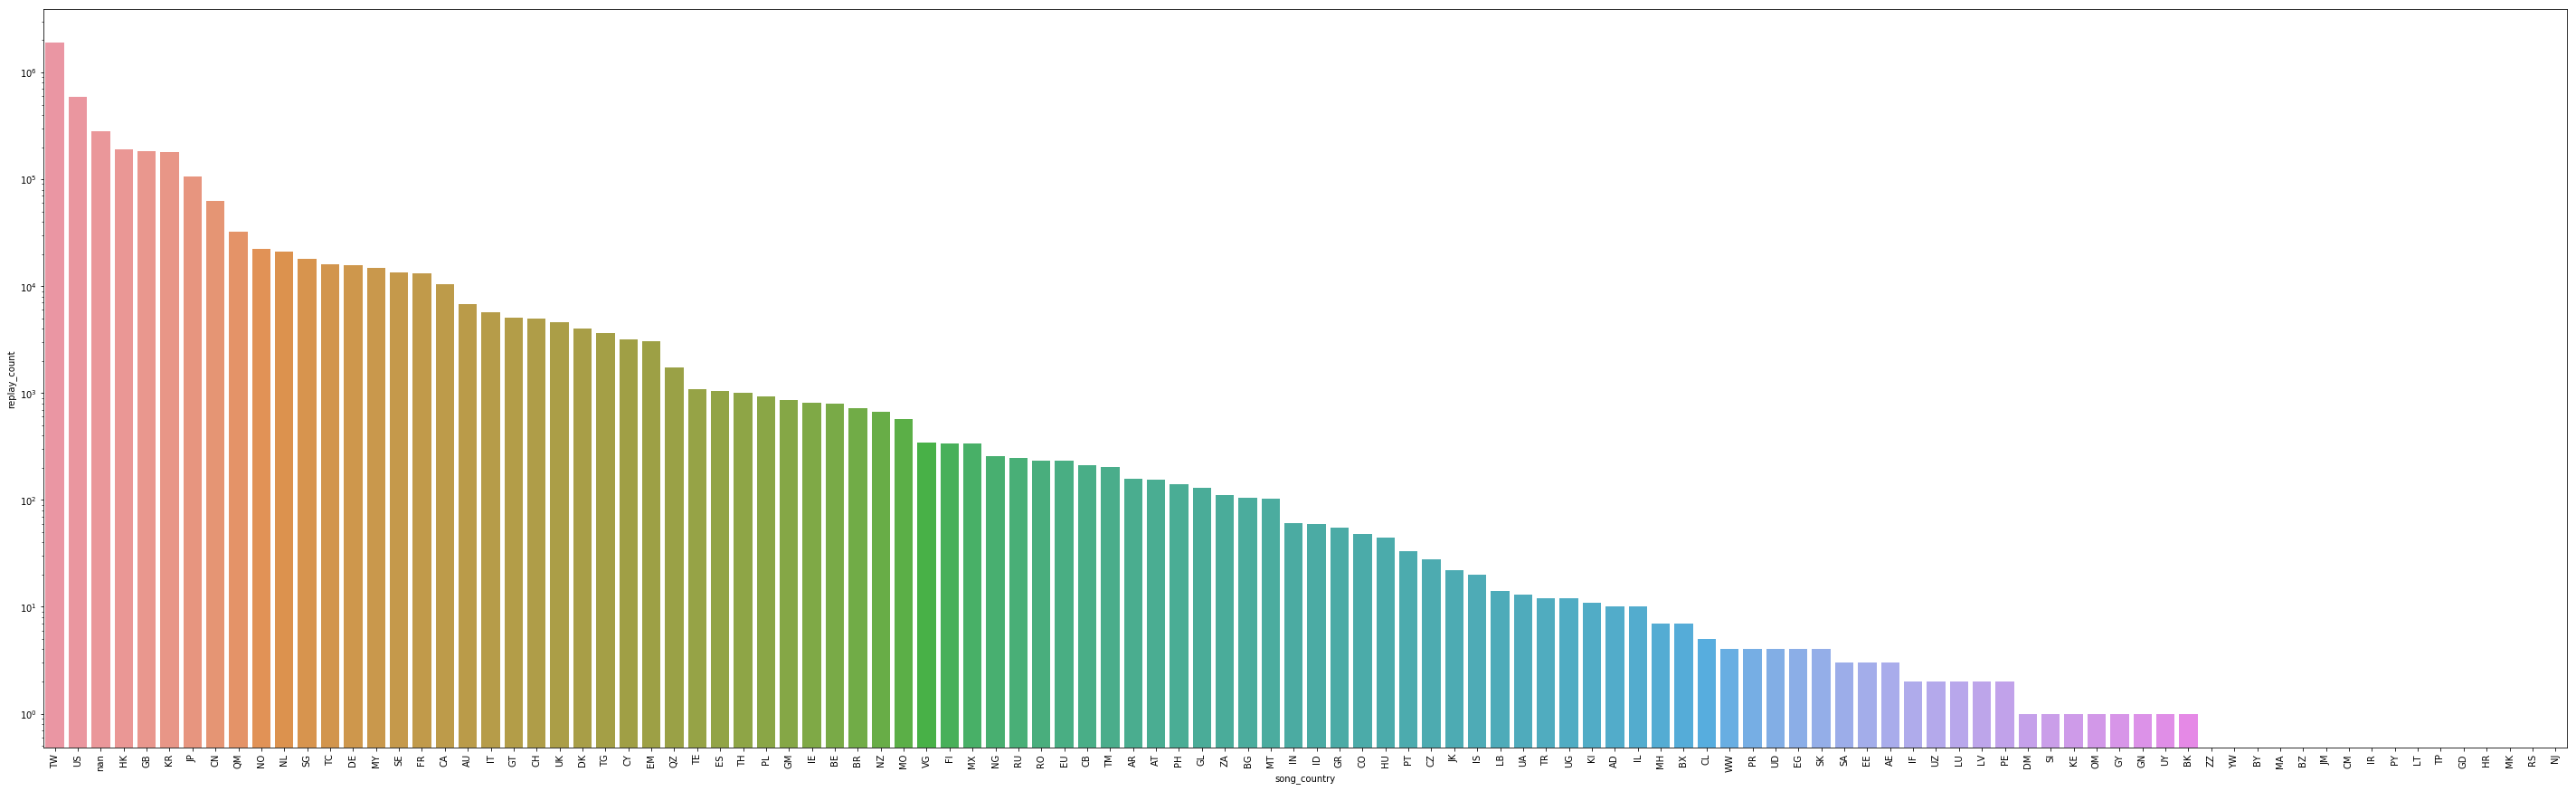

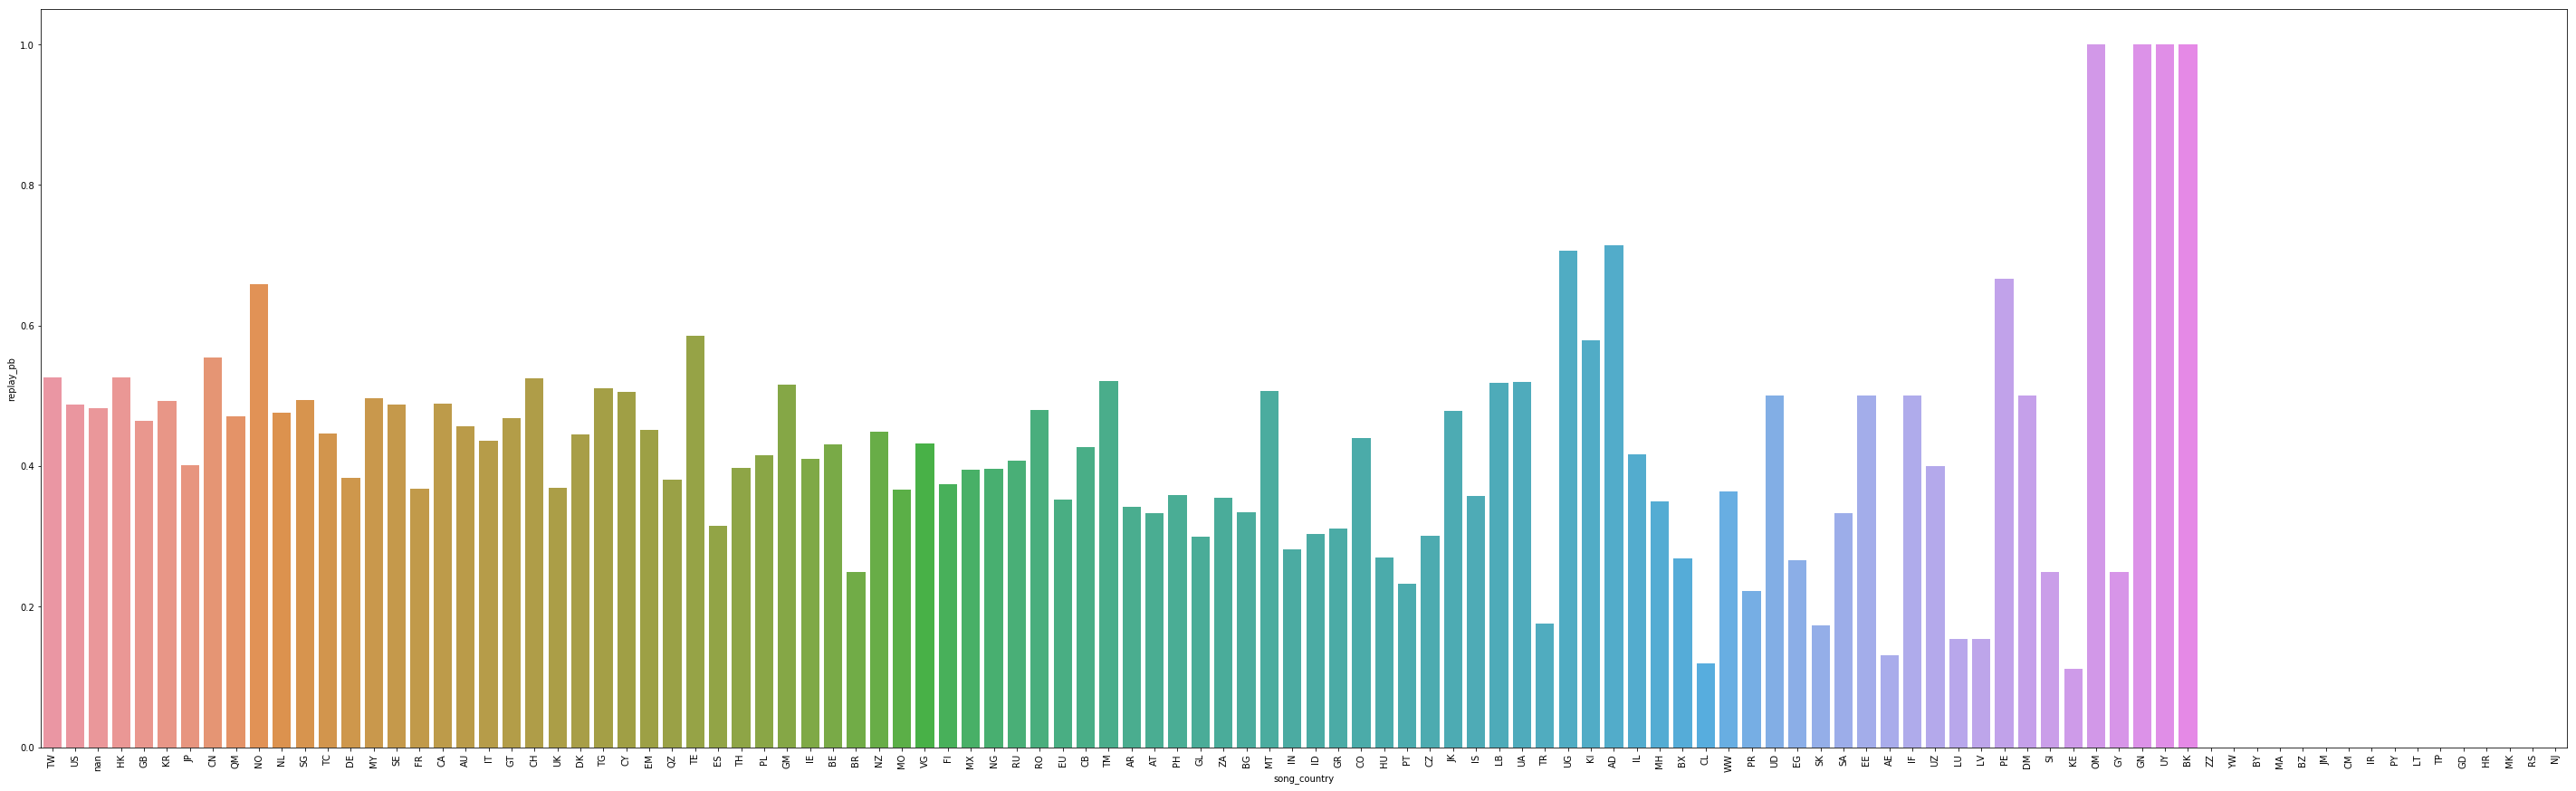

0.110927883346
0.112642397791
0.999487334237


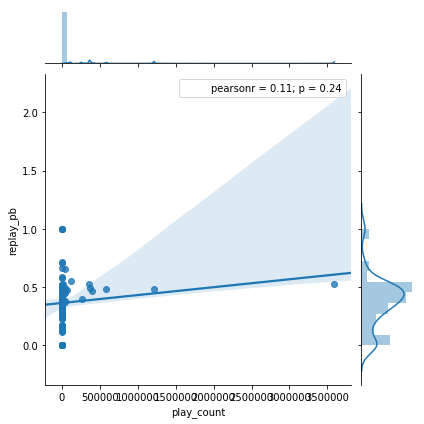

,song_country,replay_pb,play_count,replay_count
96,TW,0.526669,3588910,1890167
101,US,0.487919,1212180,591446
109,nan,0.483000,577963,279156
31,GB,0.464865,397064,184581
55,KR,0.492139,365009,179635
39,HK,0.526021,360423,189590
52,JP,0.400666,262790,105291
17,CN,0.553949,113097,62650
79,QM,0.470899,68142,32088
69,NL,0.476518,43885,20912


In [22]:
song_country_df = train_df[['song_country', 'target']].groupby('song_country').agg(['mean', 'count']).reset_index()
song_country_df.columns = ['song_country', 'replay_pb', 'play_count']
song_country_df['replay_count'] = (song_country_df['replay_pb'] * song_country_df['play_count']).astype(np.int32)

print(song_country_df.info())
plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.barplot(x='song_country', y='play_count', data=song_country_df.sort_values(by=['play_count'], ascending=False))
g.set_yscale('log', nonposy='clip')
plt.show()

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.barplot(x='song_country', y='replay_count', data=song_country_df.sort_values(by=['replay_count'], ascending=False))
g.set_yscale('log', nonposy='clip')
plt.show()

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
sns.barplot(x='song_country', y='replay_pb', data=song_country_df.sort_values(by=['replay_count'], ascending=False))
plt.show()

print(song_country_df['replay_count'].corr(song_country_df['replay_pb']))
print(song_country_df['play_count'].corr(song_country_df['replay_pb']))
print(song_country_df['play_count'].corr(song_country_df['replay_count']))

g = sns.jointplot(x="play_count", y="replay_pb", data=song_country_df, kind="reg")
plt.show()
song_country_df.sort_values(by=['play_count'], ascending=False)

Constraint with more than 100,000 play count, the replay chance larget than 0.5 contains country **TW, HK, CN**.

# composite analysis

## \# of songs played v.s. replay_pb

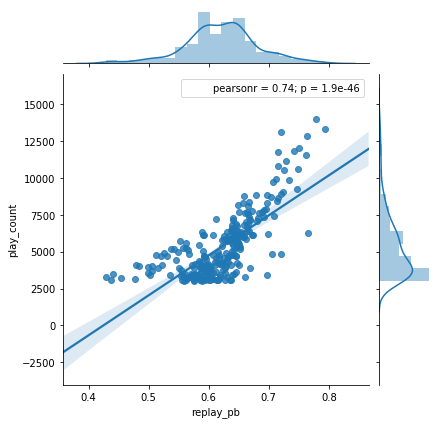

In [23]:
count_df = train_df[['song_id', 'target']].groupby('song_id').agg(
    ['mean', 'count']).reset_index()
count_df.columns = ['song_id', 'replay_pb', 'play_count']
count_df = count_df[count_df['play_count'] > 3000]

g = sns.jointplot(x="replay_pb", y="play_count", data=count_df, kind="reg")
plt.show()

We should set appropriate threshold to make the correlation between 'play_count' and 'replay_pb' better. 

## \# of tracks an artist has (track_count)

In [24]:
track_count_df = train_df[['song_id', 'artist_name']].drop_duplicates('song_id')
track_count_df = track_count_df.groupby('artist_name').agg('count').reset_index()
track_count_df.columns = ['artist_name', 'track_count']
track_count_df = track_count_df.sort_values('track_count', ascending=False)
track_count_df.head(10)

,artist_name,track_count
31960,Various Artists,17080
38961,証聲音樂圖書館 ECHO MUSIC,3997
39063,貴族精選,1211
39863,霹靂布袋戲劇集原聲帶,937
36257,張學友 (Jacky Cheung),869
39596,陳奕迅 (Eason Chan),832
39296,鄧麗君 (Teresa Teng),786
20135,Michael Jackson,657
2410,Armin van Buuren,577
37941,王菲 (Faye Wong),536


In [25]:
artist_count_df = train_df[['artist_name',
                            'target']].groupby('artist_name').agg(
                                ['mean', 'count']).reset_index()
artist_count_df.columns = ['artist_name', 'replay_pb', 'play_count']

artist_count_df = artist_count_df.merge(
    track_count_df, on='artist_name', how='left')

artist_count_df.head(10)

,artist_name,replay_pb,play_count,track_count
0,!Conz,1.000000,1,1
1,!magnic!,0.000000,1,1
2,#037 (#037),0.238095,84,1
3,#1 Beatles Now,0.218750,32,17
4,#1 Club Hits - Best Of Dance & Techno,0.714286,7,4
5,#1 Club Hits 2010 - Best Of Dance Techno (50 T...,0.250000,4,1
6,#1 Club Hits 2011 - Best Of Dance & Techno,0.500000,2,2
7,#1 Club Hits 2012 - Best of Dance| House| Elec...,1.000000,1,1
8,#1 Garth Brooks Tribute Band,0.500000,2,1
9,#1 Glee Singers,0.000000,2,1


### track_count & \# of artist

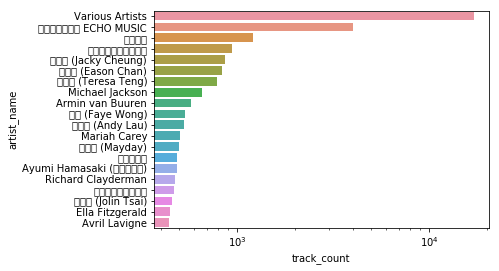

          replay_pb     play_count   track_count
count  40583.000000   40583.000000  40583.000000
mean       0.323693     181.785920      8.869872
std        0.331720    2684.600432     91.093245
min        0.000000       1.000000      1.000000
25%        0.000000       1.000000      1.000000
50%        0.270833       3.000000      2.000000
75%        0.500000      17.000000      5.000000
max        1.000000  303616.000000  17080.000000


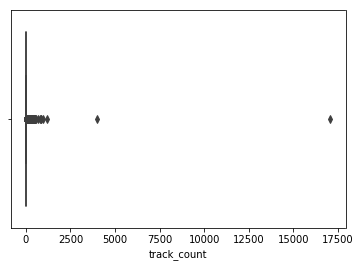

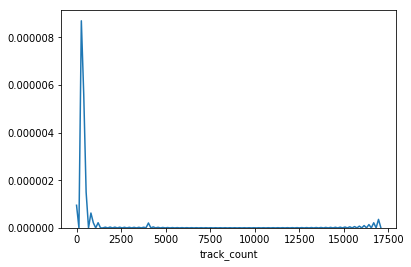

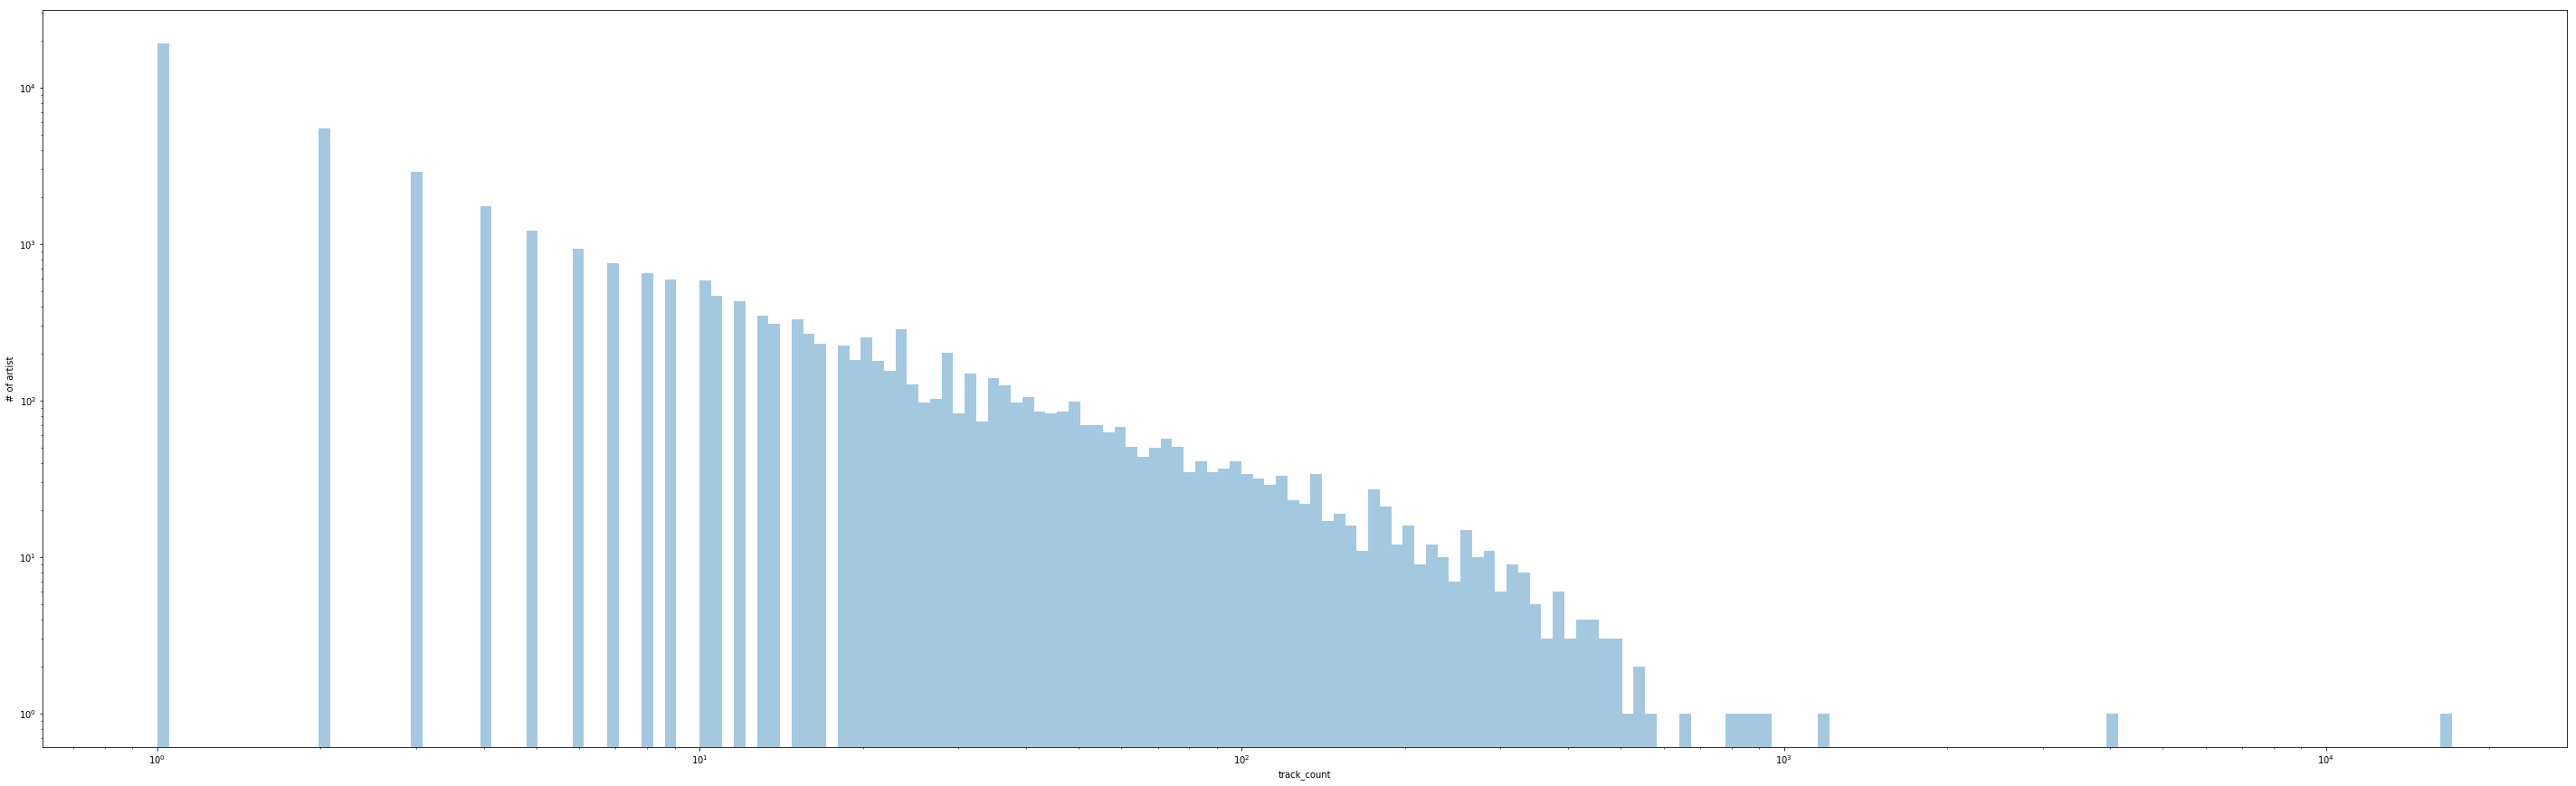

In [26]:
g = sns.barplot(y='artist_name', x='track_count', data=track_count_df.head(20))
g.set_xscale('log', nonposx='clip')
plt.show()

# print boxplot to find out the mode
print(artist_count_df.describe())

# there is extreme data
sns.boxplot(x='track_count', data=artist_count_df)
plt.show()

sns.distplot(track_count_df['track_count'], kde=True, hist=False)
plt.show()

plt.figure(figsize=(50, 15))
track_bins = np.logspace(0, np.log10(track_count_df['track_count'].max() + 1),
                         200)

g = sns.distplot(track_count_df['track_count'], bins=track_bins, kde=False)
plt.ylabel('# of artist')
g.set_xscale('log', nonposx='clip')
g.set_yscale('log', nonposy='clip')
plt.show()

We can see so many artists sing less than **29** songs.

An artist sing more songs represents this artist is not a person, is an album name indeed.

**track_count** is increasing whenever **\# of artist** is decreasing.

### track_count & play_count

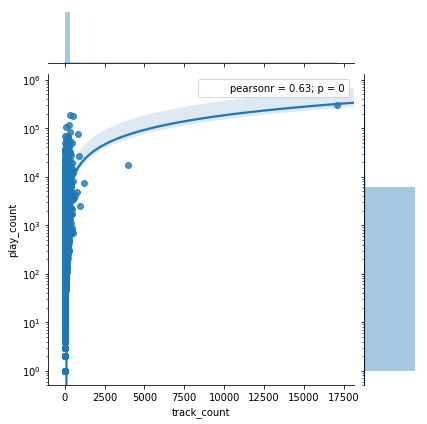

In [27]:
g = sns.jointplot(
    x='track_count', y='play_count', data=artist_count_df, kind="reg")
g.ax_joint.set_yscale('log', nonposy='clip')
plt.show()

It seems to have <font color='red'>relation between **track_count** and **play_count**</font> due to p-corr is **0.63**.

### track_count & replay_pb

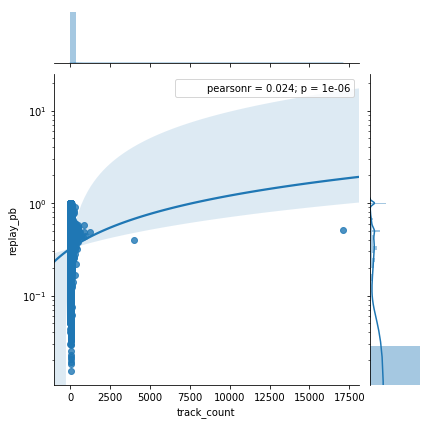

In [28]:
g = sns.jointplot(
    x='track_count', y='replay_pb', data=artist_count_df, kind='reg')
g.ax_joint.set_yscale('log', nonposy='clip')
plt.show()

The **track_count <font color='blue'>has nothing to do with</font> replay_pb**.

### \# of artist & play_count

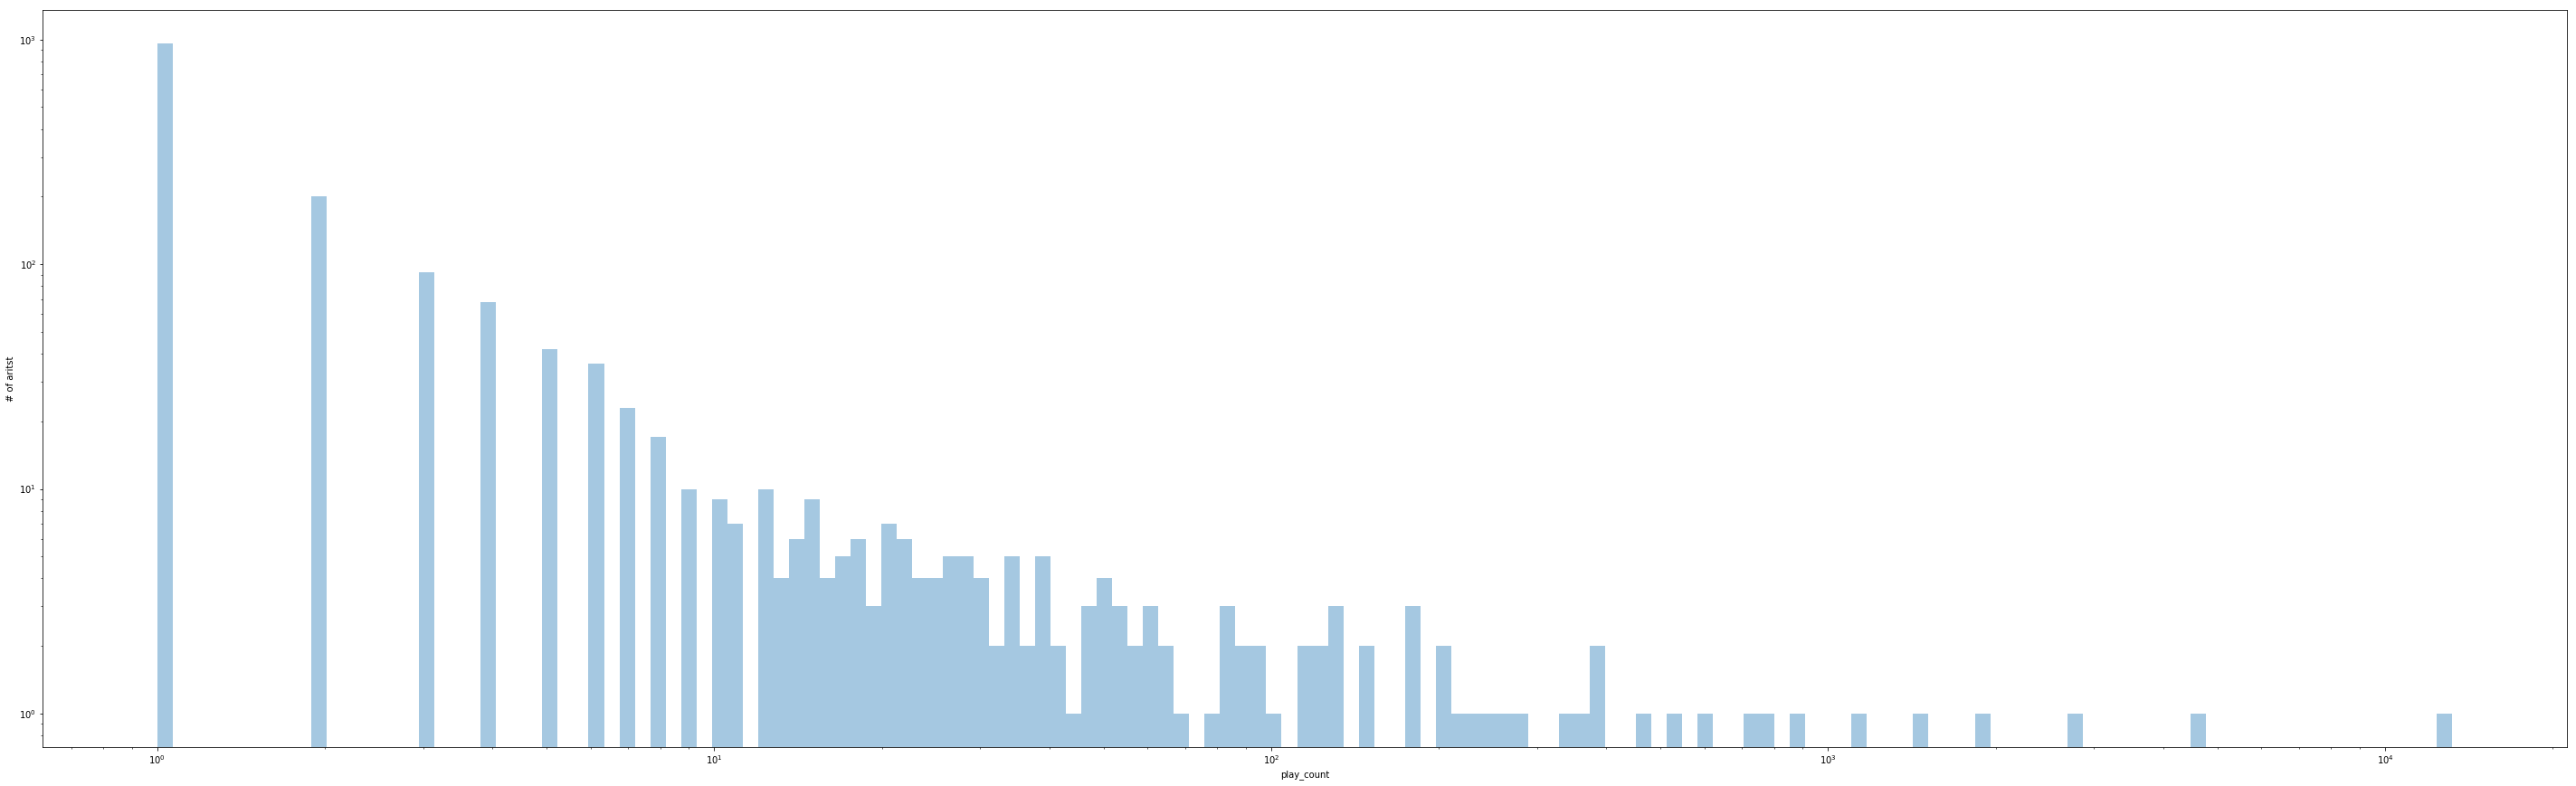

In [32]:
count_df = artist_count_df['play_count'].value_counts().reset_index()
count_df.columns = ['play_count', '#artist']

bins = np.logspace(0, np.log10(count_df['#artist'].max() + 1), 150)
plt.figure(figsize=(50, 15))
g = sns.distplot(count_df['#artist'], bins=bins, kde=False)
g.set_xscale('log', nonposx='clip')
g.set_yscale('log', nonposy='clip')
plt.xlabel('play_count')
plt.ylabel('# of aritst')
plt.show()

Many artists are played only one time.
The more **play_count**, the less **# of artist**

## membership_day

### replay_pb